In [3]:
# This code is kinda a mess, the first few blocks are designed to create the classification that is used
# to make the interactive plot and then to create the .png images of different viewpoint's kinematic maps,
# which are also used to create the interactive figure

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
def dPA_va(row):
    return row['Delta PA']*row['v_asym']
def dPA_sa(row):
    return row['Delta PA']*row['s_asym']
def dPA_resids(row):
    return row['Delta PA']*row['resids']
def dPA_lambdar(row):
    return row['Delta PA']*row['lambda_r']
def dPA_epsilon(row):
    return row['Delta PA']*row['epsilon']
def dPA_A2(row):
    return row['Delta PA']*row['A_2']
def dPA_deltapos(row):
    return row['Delta PA']*row['deltapos']
def dPA_deltapos2(row):
    return row['Delta PA']*row['deltapos2']

def va_sa(row):
    return row['v_asym']*row['s_asym']
def va_resids(row):
    return row['v_asym']*row['resids']
def va_lambdar(row):
    return row['v_asym']*row['lambda_r']
def va_epsilon(row):
    return row['v_asym']*row['epsilon']
def va_A2(row):
    return row['v_asym']*row['A_2']
def va_deltapos(row):
    return row['v_asym']*row['deltapos']
def va_deltapos2(row):
    return row['v_asym']*row['deltapos2']


def sa_resids(row):
    return row['s_asym']*row['resids']
def sa_lambdar(row):
    return row['s_asym']*row['lambda_r']
def sa_epsilon(row):
    return row['s_asym']*row['epsilon']
def sa_A2(row):
    return row['s_asym']*row['A_2']
def sa_deltapos(row):
    return row['s_asym']*row['deltapos']
def sa_deltapos2(row):
    return row['s_asym']*row['deltapos2']



def resids_lambdar(row):
    return row['resids']*row['lambda_r']
def resids_epsilon(row):
    return row['resids']*row['epsilon']
def resids_A2(row):
    return row['resids']*row['A_2']
def resids_deltapos(row):
    return row['resids']*row['deltapos']
def resids_deltapos2(row):
    return row['resids']*row['deltapos2']

def lambdar_epsilon(row):
    return row['lambda_r']*row['epsilon']
def lambdar_A2(row):
    return row['lambda_r']*row['A_2']
def lambdar_deltapos(row):
    return row['lambda_r']*row['deltapos']
def lambdar_deltapos2(row):
    return row['lambda_r']*row['deltapos2']

def epsilon_A2(row):
    return row['epsilon']*row['A_2']
def epsilon_deltapos(row):
    return row['epsilon']*row['deltapos']
def epsilon_deltapos2(row):
    return row['epsilon']*row['deltapos2']

def A2_deltapos(row):
    return row['A_2']*row['deltapos']
def A2_deltapos2(row):
    return row['A_2']*row['deltapos2']

def deltapos_deltapos2(row):
    return row['deltapos']*row['deltapos2']



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
  


def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)



feature_dict = {i:label for i,label in zip(
                range(13),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos',
                  'deltapos2'))}
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result


this is the filepath /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs ../LDA_kin_major_merger_degraded.txt


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:139: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:137: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.49, 0.59, 0.68, 0.78, 0.88, 0.98, 1.17, 1.27, 1.37, 1.42, 1.47, 1.52, 1.56, 1.66, 1.71, 1.76, 1.81, 1.86, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.54, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 2.83, 2.84, 2.92, 2.93, 3.02, 3.03, 3.13]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.12, 3.22, 3.31, 3.41, 3.62, 4.6, 5.18, 5.57, 6.06, 8.38]
IV Delta PA
SW results (0.7171076536178589, 2.3157783689188015e-28)
SW results (0.6924357414245605, 2.2276195029541987e-23)
IV s_asym
SW results (0.8452223539352417, 7.701796692434196e-22)
SW results (0.9454060196876526, 2.7805155955462624e-09)
IV resids
SW results (0.7324411869049072, 1.0123641123021783e-27)
SW results (0.9303079843521118, 7.597959761351802e-11)
IV lambda_r
SW results (0.9816879630088806, 5.448262527352199e-06)
SW results (0.8270018100738525, 6.675132062753363e-18)
IV epsilon
SW results (0.9769246578216553, 3.6229337752047286e-07)
SW resu

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 48.4 48.43493515728975
terms before adding in necessary ['resids' 'resids*lambdar' 'lambda_r' 'epsilon*A2' 'epsilon' 'A_2']
major_merger_degraded &
coefficients [[ 0.92065761 -0.51948679 -1.16726949  0.71161473  0.79436882 -0.75522808]]
coefficient std [[0.09182096 0.10375842 0.07046738 0.07624776 0.04991421 0.08148848]]
sorted inputs ['resids*lambdar' 'epsilon*A2' 'A_2' 'epsilon' 'resids' 'lambda_r']
coeff [-0.51948679  0.71161473 -0.75522808  0.79436882  0.92065761 -1.16726949]
std [0.10375842 0.07624776 0.08148848 0.04991421 0.09182096 0.07046738]
['resids*lambdar', 'epsilon*A2', 'A_2', 'epsilon', 'resids', 'lambda_r'] [-0.5194867919564022, 0.7116147261893652, -0.7552280808256218, 0.7943688221927064, 0.9206576141196517, -1.1672694929464655] [0.10375841708294414, 0.07624776045643036, 0.08148847845065514, 0.04991420970367492, 0.09182095880525665, 0.07046737667399675]
reversed list? ['lambda_r', 'resids', 'epsilon', 'A_2', 'epsilon*A2', 'resids*lambdar']
means [1.4479675534483198, 1.

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


1.91 [-1.4880135852072174, -1.1425585001677074, -1.8615075339941878, -1.2236530250496025, -2.1406695960676396, -3.069423541757943, -1.7487683863363799, -0.9724134364456156, -1.427071049636423, -0.06450937113749045]
mean -1.5138588025800206
std 0.7491846126114367
2.0 [-1.0227713672854737, -1.6636802601970413, -1.7663889382924371, -2.037501049759428, -1.0507659137239809, -1.3000028263167653, -2.9351479091136046, -1.5743008988035518, 0.40229261392851257, -1.4748776299932538, 0.45041006316087007, -1.0937857668805298]
mean -1.2555433236063902
std 0.9033612261666768
2.05 [-2.6106059960444776, -4.159681701908213, -1.0128272635242876, -2.8985333684351318, -2.282236309711529, -2.482208504619381, -3.899807502354002, -1.4975686248887148, -1.955762557625096, -0.9852428457252149, -4.886495031237095, -1.2550814530088497, -1.8941581486814405, -1.6054840531922232, -0.151627232674846, 0.3504179248436925, -2.245091314535922, -0.30356187674403445, -2.2154747243716524, 2.0899797978786596, 1.61714968080731

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:143: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.01, 4.11, 5.85, 6.24, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 4.29, 4.49, 4.68, 4.88, 9.76, 9.95, 10.15, 10.35, 10.54, 10.74, 11.13, 11.18, 11.64, 12.13, 12.61, 13.1, 13.4]
IV Delta PA
SW results (0.5204562544822693, 1.457676744417835e-23)
SW results (0.4997817873954773, 2.2298005455849537e-22)
IV s_asym
SW results (0.8899227380752563, 3.0354854047009994e-11)
SW results (0.8590030670166016, 6.806258247976649e-12)
IV resids
SW results (0.9261990189552307, 9.546139878580107e-09)
SW results (0.9434345364570618, 1.493217610004649e-06)
IV lambda_r
SW results (0.9475659728050232, 6.764769864275877e-07)
SW results (0.8845694661140442, 1.4493214961497358e-10)
IV epsilon
SW results (0.9228248596191406, 5.229274790963245e-09)
SW results (0.9312566518783569, 1.5441618472777918e-07)
IV A_2
SW results (0.8294076323509216, 2.1396789166

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 15.7 16.048999599679682
terms before adding in necessary ['dPA*deltapos2' 'sa*deltapos2' 'Delta PA' 'va*deltapos2' 'deltapos2'
 'va*lambdar' 'lambda_r' 'A_2' 'lambdar*epsilon' 'dPA*deltapos'
 'sa*deltapos' 'A2*deltapos' 'resids*epsilon' 'resids' 'deltapos'
 'resids*lambdar' 'dPA*va' 'va*A2' 'dPA*sa' 's_asym' 'epsilon'
 'va*deltapos' 'sa*epsilon' 'lambdar*deltapos2' 'dPA*resids' 'v_asym'
 'va*epsilon']
minor_merger_degraded &
coefficients [[-9.57285590e-01 -5.63872430e-01  2.25165027e+00  3.85370746e-01
   6.07451168e-01  3.92026292e+00  6.34658234e-01 -6.69389287e-01
   2.89371764e-01 -1.38682251e-01  5.24659771e-01  4.57597866e-01
   4.24694453e+00  2.12853778e+00 -6.64377903e-01 -6.15970988e+00
  -1.47129225e+00  3.15311476e-01  2.04702630e-01  2.85443909e-01
  -1.25360938e+00 -4.98134180e-02  1.04210571e+00 -1.05097664e-01
  -1.96515487e-04 -2.86931814e+00 -3.48369133e+00]]
coefficient std [[0.17516784 0.25654845 0.65293385 0.21312255 0.36994705 0.4800855
  0.56121024 0.18766142 0

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


2.05 [-0.04075496121199873, 1.0299143389262428, 0.5298725616255532, -0.9178096466418847, 0.5424172776896338, -0.8149831005157904, 0.16940872792041028]
mean 0.07115217111316662
std 0.669455946016844
DECISION BOUNDARY -0.8503162239129494 minor_merger_degraded
myr [0.39, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.01, 4.11, 5.85, 6.24, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
run minor_merger_degraded
coalescence 0
myr_here [0.39 0.59 0.88 0.98 1.17 1.47 1.76 1.96 2.05 2.35 2.64 2.93 3.13 3.32
 3.52 3.72 3.91 4.01 4.11 5.85 6.24 6.83 7.8  8.19 8.78 9.17 9.56] 27
new_means [ 0.16469143  0.66476118 -0.21541353 -0.51867982 -0.2374009  -0.16906977
  0.07744997 -0.31883551  0.07115217 -0.07729958  0.66721308 -0.3821468
 -0.27964885 -0.16058295 -1.0463649  -1.35476348 -0.45627582 -0.68957819
 -0.23015375 -0.51837057 -0.23039851 -0.69167857 -0.55875155 -0.55570171
 -1.13444204 -0.13581508 -0.97297953] 27
this is the filepath /Users/beckynevin/CfA_C

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:123: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
IV Delta PA
SW results (0.7492445707321167, 4.938800019990697e-13)
SW results (0.6460962295532227, 5.2594947488398054e-18)
IV s_asym
SW results (0.8566305637359619, 2.055134062928232e-09)
SW results (0.9472737908363342, 1.124027585319709e-05)
IV resids
SW results (0.7052193880081177, 3.325179961564083e-14)
SW results (0.9222675561904907, 1.5166280320499936e-07)
IV lambda_r
SW results (0.9577049016952515, 0.000831267680041492)
SW results (0.8126001954078674, 5.303853601971997e-13)
IV epsilon
SW results (0.9552932977676392, 0.0005397546337917447)
SW results (0.913358747959137, 3.978518137159881e-08)
IV A_2
SW results (0.9038747549057007, 3.1135286349126545e-07)
SW results (0.9638028144836426, 0.00035796427982859313)
IV deltapos
SW results (0.6567714214324951, 2

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


m 10.4 10.645362404707372
terms before adding in necessary ['resids' 'resids*lambdar' 'lambda_r' 'dPA*epsilon' 'Delta PA' 'epsilon']
fg3_m12_degraded_cleaned &
coefficients [[ 0.84356878 -0.49305872 -1.08937135  0.67413278 -0.43848598  0.68035738]]
coefficient std [[0.15711438 0.16802504 0.18065402 0.04232244 0.06427696 0.09030155]]
sorted inputs ['Delta PA' 'resids*lambdar' 'dPA*epsilon' 'epsilon' 'resids' 'lambda_r']
coeff [-0.43848598 -0.49305872  0.67413278  0.68035738  0.84356878 -1.08937135]
std [0.06427696 0.16802504 0.04232244 0.09030155 0.15711438 0.18065402]
['Delta PA', 'dPA*epsilon', 'epsilon', 'resids', 'lambda_r'] [-0.43848598419482415, 0.6741327813910705, 0.6803573806059849, 0.8435687778217893, -1.0893713531155902] [0.06427696132435254, 0.04232244383428935, 0.09030155050746481, 0.15711437522161384, 0.18065401679516868]
reversed list? ['lambda_r', 'resids', 'epsilon', 'dPA*epsilon', 'Delta PA']


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


means [1.2298788147976558, 0.3314190438148746, 0.11194795471984419, 0.3835434274749443, 0.5234562467730263, -0.01150453289611055, 0.2216834992673594, 0.13252336932250325, 0.18739114159626089, 0.11194795471984412, -0.38872046727819426, -0.6205368051348201, -0.35834723619807834, -0.7228260091594683, -1.0539922060975053, -1.246029409055657, -1.1088599783712632, -1.17744469371346, -0.9168227754131114, -1.0755474023479104, -1.0579113326884881]
[-0.0802717817983125, 0.28637393311230885, -0.1256989552809493, -0.3230419759227793, 0.13325899304900532, -0.15982698409023985, -0.27235724124519783, 0.12599525718756852, 0.39590645800699126, 3.124139293872468, 0.6327273065687575, -0.16476171258023187, 0.8072546199197433, 1.6330475023437736, 0.242330328365184, 0.13256720868124944, 0.5236559712525789, -0.0237760584315815, -0.3067158648437403, -0.04146597297848218, 0.06763830445044668]
[0.12011217368058742, 1.228687108160549, 0.5281293370655734, 0.657463079421569, 0.8976543152255607, 0.30487466276058095

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


1.91 [-1.761111413025243, -2.0134804614445625, -1.1952084864468793, -1.9872612551423257, 1.4082469275444183]
mean -1.1097629377029183
std 1.2929530632946042
2.0 [-1.435445159158053, -1.8081868935249428, -1.5740085477394465, 0.23715264978315753, -2.6928045781896213, 0.9412699854843205, -0.5628675048516087]
mean -0.9849842925994563
std 1.1665843945809515
2.05 [-0.7092232083039838, 0.6625655291509029, -1.4404276473360964, -0.46585774862642393, -1.4880750468513644, 0.783145720049649, 0.7237074277763527]
mean -0.2763092820201377
std 0.9297353815837328
DECISION BOUNDARY -2.198576266883114 fg3_m12_degraded_cleaned
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.54, 2.59]
run fg3_m12_degraded_cleaned
coalescence 2.15
myr_here [0.39 0.59 0.78 0.98 1.17 1.37 1.56 1.66 1.76 1.81 1.86 1.91 2.   2.05
 2.15 2.2  2.25 2.35 2.54 2.59] 20
new_means [-3.86881237 -0.88588197 -2.14184278 -2.53733026 -2.30246169 -2.1740578
 -2.48792869 -2.215

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


 [0.39, 0.68, 0.78, 0.98, 1.17, 1.37, 1.47, 1.66, 1.76, 1.86, 2.05, 2.15, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 2.84, 2.93, 3.03]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 3.13, 3.62, 4.6]
IV Delta PA
SW results (0.625625491142273, 1.6867391422329122e-19)
SW results (0.6797467470169067, 2.1137592544351325e-12)
IV s_asym
SW results (0.869082510471344, 2.81408334135147e-11)
SW results (0.9392731189727783, 0.0005350632127374411)
IV resids
SW results (0.7765507698059082, 3.750433615062757e-15)
SW results (0.8964775204658508, 4.3970567276119255e-06)
IV lambda_r
SW results (0.9783428907394409, 0.007359770126640797)
SW results (0.8238217830657959, 9.849695281616277e-09)
IV epsilon
SW results (0.9633415341377258, 0.0001349191297776997)
SW results (0.8994031548500061, 5.88487910135882e-06)
IV A_2
SW results (0.812429666519165, 8.185373358933143e-14)
SW results (0.9662567973136902, 0.02392551116645336)
IV deltapos
S

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 11.0 11.072308292331602
terms before adding in necessary ['s_asym' 'epsilon' 'resids*epsilon' 'A2*deltapos' 'v_asym' 'deltapos'
 'lambda_r' 'A_2' 'lambdar*epsilon' 'Delta PA' 'va*A2' 'dPA*sa' 'resids'
 'va*deltapos2' 'deltapos2']
fg3_m13_degraded &
coefficients [[ 1.51605006  5.56445786 -2.80470745  0.94784209 -1.21936887 -0.55036804
  -2.14458659 -1.31748678 -2.0465685   4.20689343  0.94755151 -4.1708174
   2.45038284  0.64086845 -0.71694774]]
coefficient std [[0.13635754 0.43085425 0.25927905 0.16471537 0.45878319 0.10211808
  0.31192511 0.11141345 0.54991904 0.19111516 0.25103368 0.23446759
  0.21894739 0.84210557 0.20442314]]
sorted inputs ['deltapos' 'va*deltapos2' 'deltapos2' 'va*A2' 'A2*deltapos' 'v_asym'
 'A_2' 's_asym' 'lambdar*epsilon' 'lambda_r' 'resids' 'resids*epsilon'
 'dPA*sa' 'Delta PA' 'epsilon']
coeff [-0.55036804  0.64086845 -0.71694774  0.94755151  0.94784209 -1.21936887
 -1.31748678  1.51605006 -2.0465685  -2.14458659  2.45038284 -2.80470745
 -4.1708174   4.20689

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


2.05 [0.35499883474347693, -1.4945188698903187, 0.12062186805725217, 3.5361218124015594, -0.1955945429708561, -1.0770064180587733, 0.434071746966775]
mean 0.23981349017844503
std 1.505341095334341
DECISION BOUNDARY -2.200244933663085 fg3_m13_degraded
myr [0.39, 0.68, 0.78, 0.98, 1.17, 1.37, 1.47, 1.66, 1.76, 1.86, 2.05, 2.15, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 3.03]
run fg3_m13_degraded
coalescence 2.59
myr_here [0.39 0.68 0.78 0.98 1.17 1.37 1.47 1.66 1.76 1.86 2.05 2.15 2.25 2.3
 2.32 2.35 2.37 2.4  2.42 2.44 2.46 2.49 2.51 2.56 2.59 2.64 2.69 2.74
 2.79 3.03] 30
new_means [-1.86449931 -1.1898948  -1.78672806 -1.26646376 -2.14745822 -1.0628498
 -1.01808398 -0.87551807 -1.9445369  -0.50122994  0.23981349  0.40566622
 -0.37306953  0.08320604 -0.21195048 -1.4217032  -1.24905832 -0.37330413
 -0.27919134 -1.02340425  1.01472945  0.61670681  0.77597959 -0.00295784
  0.11592575  1.69284027  0.14069918  1.57781044 -0.20293775  

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 1.42, 1.47, 1.52, 1.66, 1.71, 1.76, 1.81, 1.86, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 3.31, 3.41, 8.38]
IV Delta PA
SW results (0.7475348711013794, 6.91275747809239e-18)
SW results (0.7770336270332336, 4.214111264805309e-12)
IV s_asym
SW results (0.8633185029029846, 5.425784604592976e-13)
SW results (0.9264653325080872, 6.865795512567274e-06)
IV resids
SW results (0.7042837142944336, 2.7469582468332073e-19)
SW results (0.931736409664154, 1.4472145267063752e-05)
IV lambda_r
SW results (0.9573395848274231, 4.7164007810351904e-06)
SW results (0.8036642670631409, 2.947798949382019e-11)
IV epsilon
SW results (0.9755815863609314, 0.000841647619381547)
SW results (0.8882541656494141, 6.291844556471915e-08)
IV A_2
SW results (0.7514426708221436, 9.435013145501333e-18)
SW results (0.9746410846710205, 0.0247

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 8.9 9.357417562100672
terms before adding in necessary ['deltapos2' 's_asym' 'epsilon' 'v_asym' 'dPA*epsilon' 'deltapos'
 'resids*lambdar' 'lambda_r' 'dPA*va' 'epsilon*deltapos2' 'Delta PA'
 'dPA*resids' 'dPA*deltapos' 'dPA*sa' 'resids' 'lambdar*epsilon']
fg1_m13_degraded &
coefficients [[-1.15232927  0.76618345  0.95331466 -3.29341312 -0.71009234  0.65149388
  -2.92150776 -3.25914225  2.77375528  1.06858723  0.14126966  1.70967926
  -0.92600371 -1.46738138  2.51177102  1.45155431]]
coefficient std [[0.174332   0.10216016 0.20161069 0.33081953 0.15321448 0.13201037
  0.43490441 0.43573391 0.30402135 0.21860295 0.46022486 0.28371657
  0.13521315 0.3795996  0.29302603 0.43078184]]
sorted inputs ['Delta PA' 'deltapos' 'dPA*epsilon' 's_asym' 'dPA*deltapos' 'epsilon'
 'epsilon*deltapos2' 'deltapos2' 'lambdar*epsilon' 'dPA*sa' 'dPA*resids'
 'resids' 'dPA*va' 'resids*lambdar' 'lambda_r' 'v_asym']
coeff [ 0.14126966  0.65149388 -0.71009234  0.76618345 -0.92600371  0.95331466
  1.06858723 -1.

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


1.91 [-1.2268668875658846, 1.0728950073524453, -0.7223928870004401, -0.5512986602357501, -1.1646671082898266]
mean -0.5184661071478912
std 0.8360025962161495
2.0 [1.2920149141153767, 0.04419174059388231, -0.6664381251128375, -0.5855721992198422, 0.7058694909531242]
mean 0.15801316426594073
std 0.7525557735062705
2.05 [0.07356925624621535, -1.4045465583405374, 2.123143333675182, -1.4734651702845798, -0.31530477438284255, -1.5362607272585425, 1.209614412733162]
mean -0.18903574680170612
std 1.3271634762453346
DECISION BOUNDARY -2.1913388796594404 fg1_m13_degraded
myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 1.42, 1.47, 1.52, 1.66, 1.71, 1.76, 1.81, 1.86, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
run fg1_m13_degraded
coalescence 2.74
myr_here [0.39 0.49 0.59 0.68 0.88 1.17 1.27 1.37 1.42 1.47 1.52 1.66 1.71 1.76
 1.81 1.86 1.91 1.96 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.44
 2.54 2.64 2.74 2.83 2.92 3

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:129: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 4.29, 4.49, 4.68, 4.88]
IV Delta PA
SW results (0.5142865180969238, 5.13730941901776e-17)
SW results (0.6135808229446411, 2.320125902922736e-14)
IV s_asym
SW results (0.8920327425003052, 3.5850658264280355e-07)
SW results (0.914945662021637, 1.3628106898977421e-05)
IV resids
SW results (0.8844094276428223, 1.6240335298789432e-07)
SW results (0.8798192739486694, 3.532652783633239e-07)
IV lambda_r
SW results (0.9449920058250427, 0.00027336840867064893)
SW results (0.849265456199646, 2.375741203763937e-08)
IV epsilon
SW results (0.9174247980117798, 6.493502951343544e-06)
SW results (0.8979306817054749, 2.1284220110828755e-06)
IV A_2
SW results (0.8621793985366821, 1.9021634045657265e-08)
SW results (0.9611966013908386, 0.006942471954971552)
IV deltapos
SW results (0.5024502873420715, 3.268266700813367e-17)
SW results (0.7849774360656

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 6.3 7.190890230020664
terms before adding in necessary ['s_asym' 'epsilon' 'sa*epsilon' 'sa*lambdar' 'va*lambdar' 'dPA*epsilon'
 'deltapos' 'lambda_r' 'dPA*lambdar' 'Delta PA' 'va*epsilon' 'v_asym'
 'lambdar*deltapos2' 'deltapos2']
fg3_m15_degraded &
coefficients [[  5.8733825   -1.99337407   7.96860487 -13.4583049    9.12828295
    0.08845532   0.19742536  -0.14035404   0.48863736  -0.38751228
   -5.05300566  -7.72021697   1.66495678  -1.38121441]]
coefficient std [[0.5435876  0.41787083 0.66375292 0.97969161 0.69884094 0.13590186
  0.03264515 0.48131596 0.37529854 0.3230263  0.51163643 0.63820828
  0.42534706 0.38214809]]
sorted inputs ['dPA*epsilon' 'lambda_r' 'deltapos' 'Delta PA' 'dPA*lambdar' 'deltapos2'
 'lambdar*deltapos2' 'epsilon' 'va*epsilon' 's_asym' 'v_asym' 'sa*epsilon'
 'va*lambdar' 'sa*lambdar']
coeff [  0.08845532  -0.14035404   0.19742536  -0.38751228   0.48863736
  -1.38121441   1.66495678  -1.99337407  -5.05300566   5.8733825
  -7.72021697   7.96860487   9.1282829

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1446: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


2.05 [-0.7766778471316084, 0.9568015098388779, -0.8072527698156047, -0.38248899610625375, 1.060930719286039, 0.3683517752493658, 2.378900699125062]
mean 0.3997950129208397
std 1.076915281535283
DECISION BOUNDARY -0.8459971474916337 fg3_m15_degraded
myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
run fg3_m15_degraded
coalescence 3.72
myr_here [0.59 0.88 1.17 1.47 1.76 2.05 2.35 2.64 2.93 3.13 3.32 3.52 3.72 3.91
 4.11] 15
new_means [ 0.54880545  0.45892665 -0.05234055  0.22797762  0.12174246  0.39979501
 -0.55712555  1.09416031 -0.02732971  0.51334302  0.60560374 -0.23575039
 -0.59059711 -0.20957095  0.05003074] 15


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1781: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


this is the filepath /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs ../LDA_kin_fg3_m10_degraded.txt


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 5.85, 6.24, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 9.76, 9.95, 10.15, 10.35, 10.54, 10.74, 11.13, 11.18, 11.64, 12.13, 12.61, 13.1, 13.4]
IV Delta PA
SW results (0.5487193465232849, 2.4097190023856347e-16)
SW results (0.5330938100814819, 1.4145097374916774e-19)
IV s_asym
SW results (0.8836159706115723, 1.6698942317816545e-07)
SW results (0.8659340739250183, 3.840764928320084e-10)
IV resids
SW results (0.9553660154342651, 0.0014767397660762072)
SW results (0.9369859099388123, 4.438848918653093e-06)
IV lambda_r
SW results (0.9338151216506958, 5.945675366092473e-05)
SW results (0.8483355045318604, 6.35954205963074e-11)
IV epsilon
SW results (0.9150104522705078, 5.306084403855493e-06)
SW results (0.9142020344734192, 1.364218462640565e-07)
IV A_2
SW results (0.8284577131271362, 1.2185482622939503e-09)
SW results (0.8830927014350891, 2.5874247189250354e-09)
IV deltapos
SW results (

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 9.3 9.625940669922601
terms before adding in necessary ['v_asym' 'Delta PA' 'dPA*va' 'lambdar*epsilon' 'lambda_r' 'epsilon']
fg3_m10_degraded &
coefficients [[-0.60411928  1.64666193 -1.71635827  1.96363308 -0.70875892 -1.21038712]]
coefficient std [[0.0664285  0.28051    0.34686358 0.27664014 0.14439139 0.27057451]]
sorted inputs ['v_asym' 'lambda_r' 'epsilon' 'Delta PA' 'dPA*va' 'lambdar*epsilon']
coeff [-0.60411928 -0.70875892 -1.21038712  1.64666193 -1.71635827  1.96363308]
std [0.0664285  0.14439139 0.27057451 0.28051    0.34686358 0.27664014]
['v_asym', 'lambda_r', 'epsilon', 'Delta PA', 'dPA*va', 'lambdar*epsilon'] [-0.6041192798256984, -0.7087589234295836, -1.2103871238550448, 1.6466619254629802, -1.7163582725004123, 1.9636330752724827] [0.06642849890744748, 0.1443913949137048, 0.2705745094097139, 0.28050999799419424, 0.3468635782415548, 0.27664013520859837]
reversed list? ['lambdar*epsilon', 'dPA*va', 'Delta PA', 'epsilon', 'lambda_r', 'v_asym']
means [0.4927720455626214, 0.

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1152: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


~~~~~
fg3_m10_degraded & \textbf{1.65 $\pm$ 0.28} & \textbf{-0.6 $\pm$ 0.07} & -- & -- & \textbf{-0.71 $\pm$ 0.14} & \textbf{-1.21 $\pm$ 0.27} & -- & -- & -- & \textbf{-0.89 $\pm$ 0.02}\\
fg3_m10_degraded & \textbf{-1.72 $\pm$ 0.35} & -- & -- & -- & -- & -- & -- & --\\
fg3_m10_degraded & -- & -- & -- & -- & -- & -- & --\\
fg3_m10_degraded & -- & -- & -- & -- & -- & --\\
fg3_m10_degraded & -- & -- & -- & -- & -- & \textbf{1.96 $\pm$ 0.28} & -- & -- & -- & -- & -- & -- & -- & -- & --\\
~~~~~
intercept [-0.88706488]
intercept std [0.01523101]
~~~Accuracy~~~
0.6265060240963856
~~~Precision~~~
0.8235294117647058
~~~Recall~~~
0.1346153846153846
~~~F1~~~
0.2314049586776859


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1446: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1461: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1462: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


DECISION BOUNDARY -0.849807236785783 fg3_m10_degraded
myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 5.85, 6.24, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
run fg3_m10_degraded
coalescence 9.17
myr_here [0.39 0.59 0.98 1.96 2.93 3.91 4.01 4.11 5.85 6.24 6.83 7.8  8.19 8.78
 9.17 9.56] 16
new_means [-0.7403347  -0.45263204 -0.54003585 -0.80721809 -0.65486914 -0.70473142
 -0.61170936  0.01943841 -0.7828327  -0.61436043 -0.6204855  -0.81398458
 -0.67463029 -0.53472528 -0.91739532 -0.60441335] 16


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1781: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

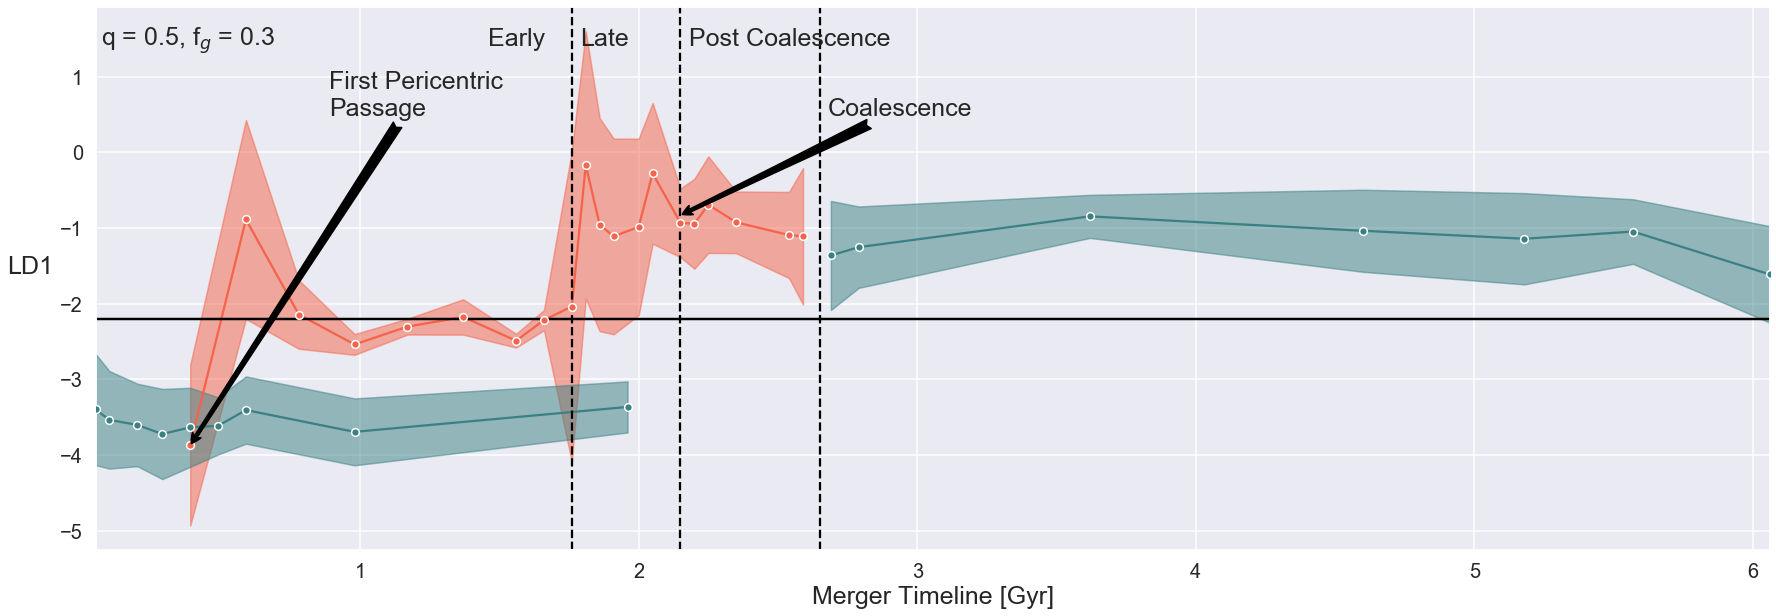

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

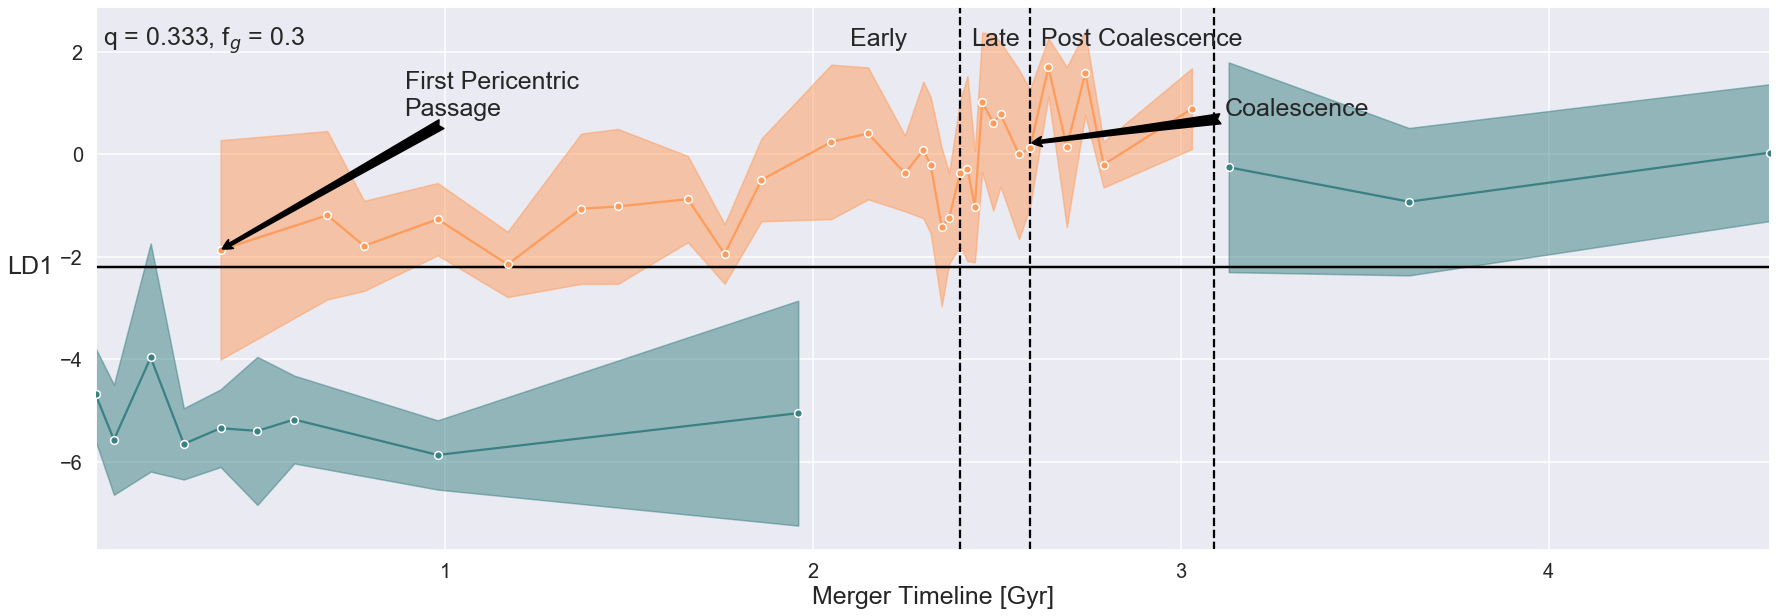

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

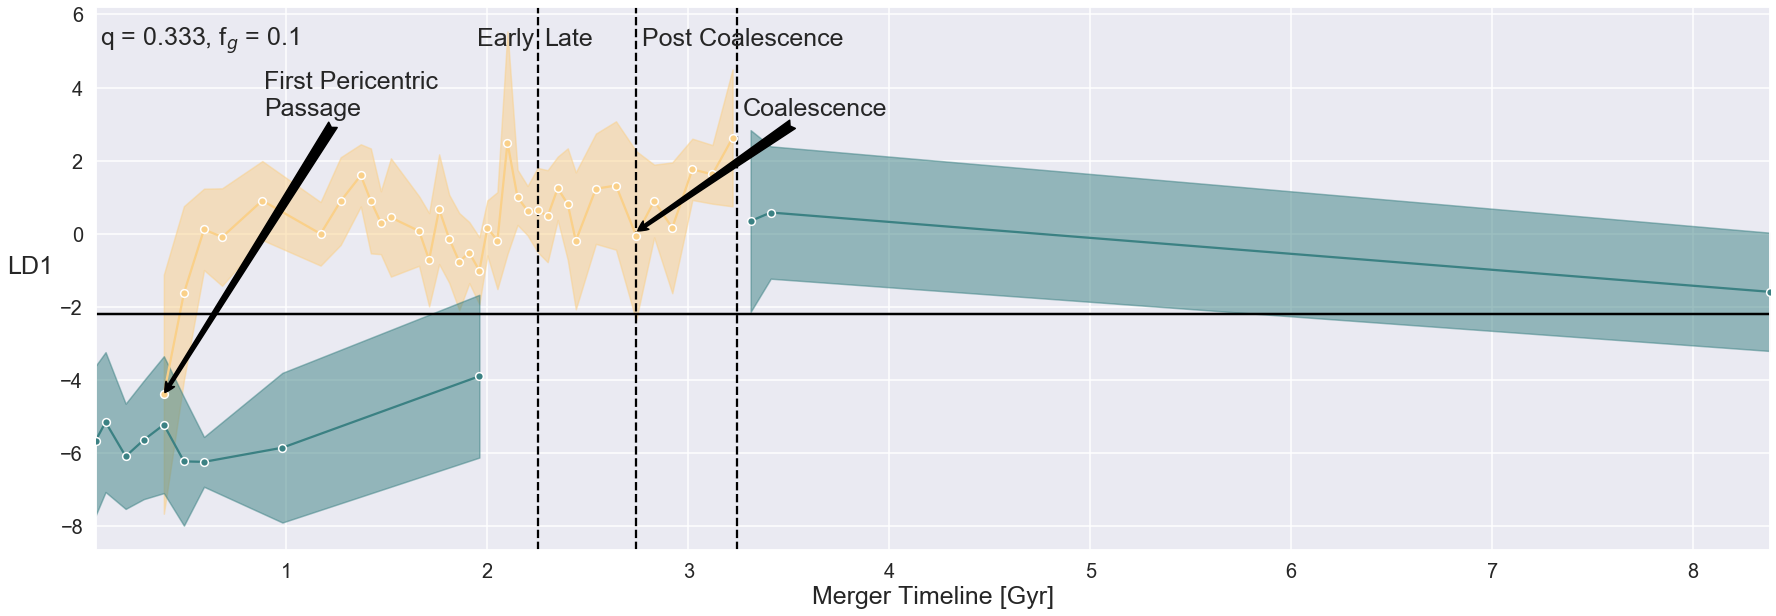

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

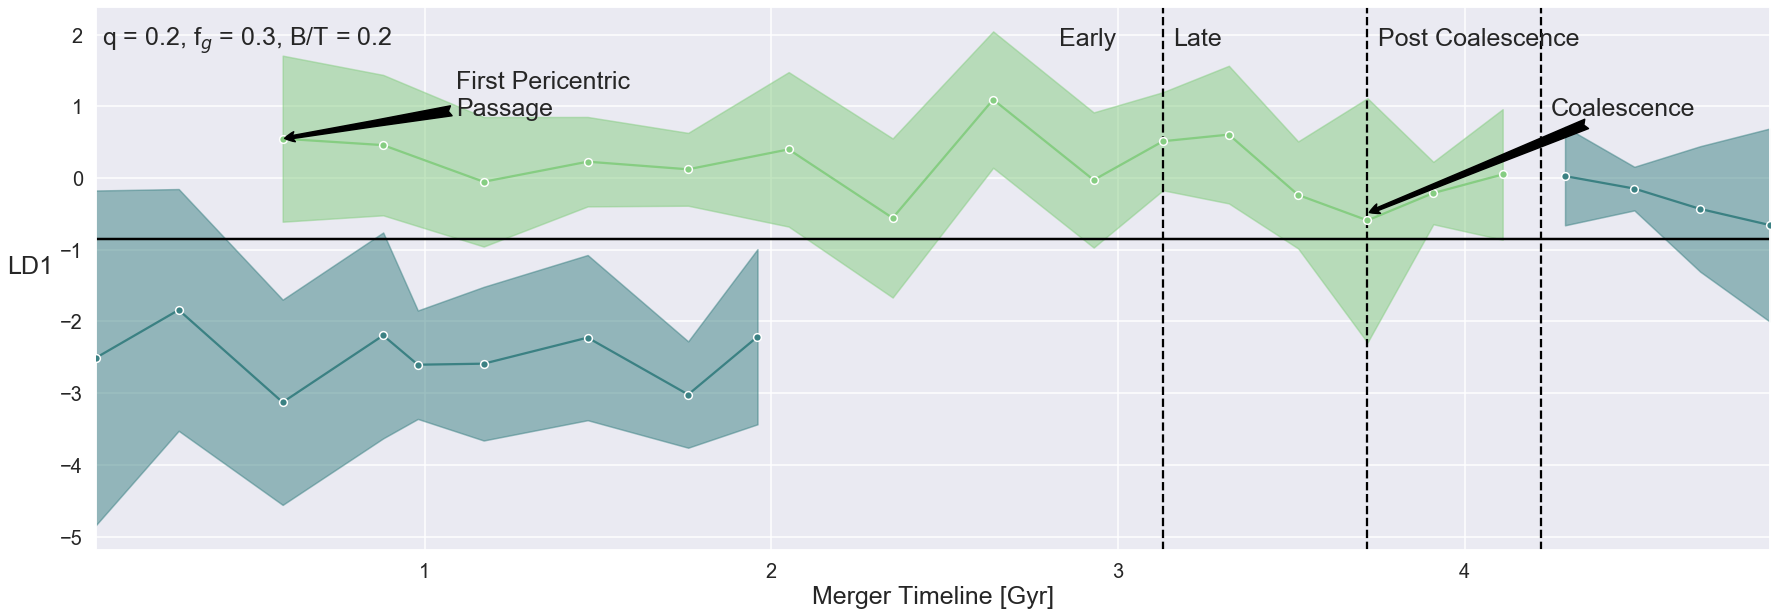

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

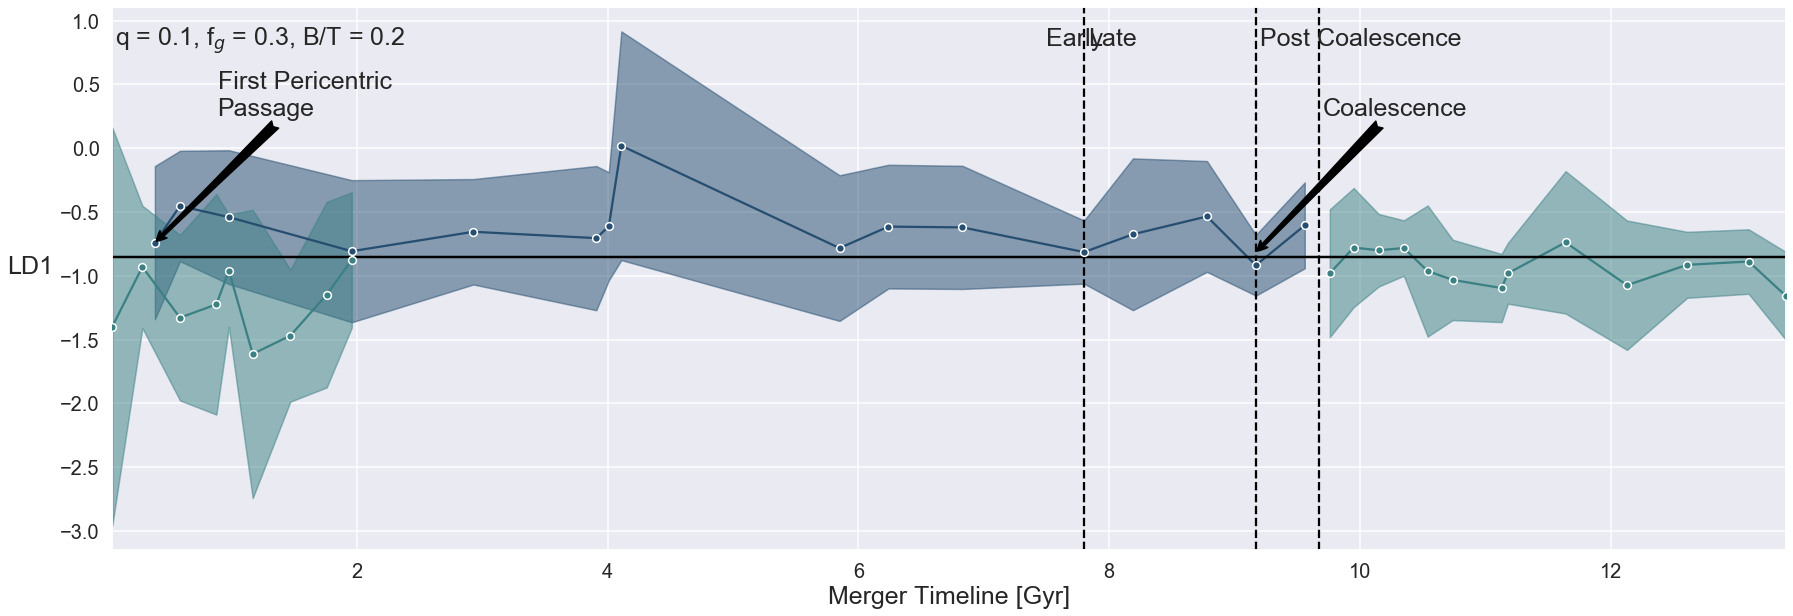

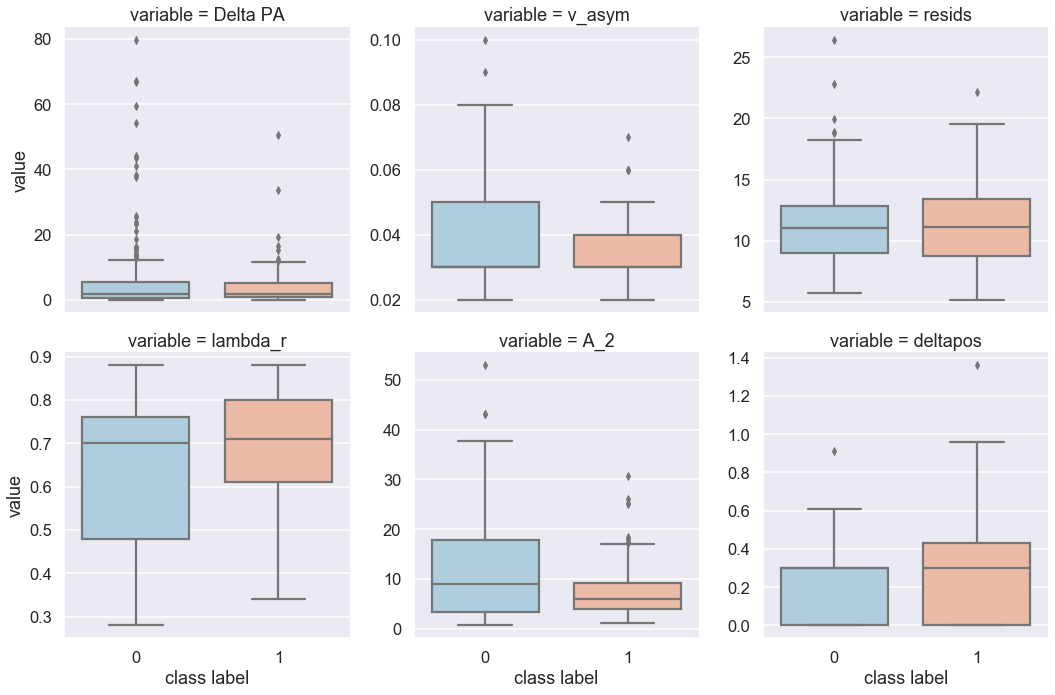

In [49]:
# Right now I'm just running the classification for one simulation
# but the eventual goal is to create some sort of loop that will
# produce different tabs in the interactive plot for each different
# simulation (I think this won't be too hard)

list_runs=['major_merger_degraded','minor_merger_degraded',
           'fg3_m12_degraded_cleaned','fg3_m13_degraded','fg1_m13_degraded','fg3_m15_degraded','fg3_m10_degraded']
colors=["#ED303C","#A0EEC0", "#F5634A","#FF9C5B",
        "#FAD089","#86CD82","#254E70"]
names=['Major Merger','Minor Merger','q0.5_fg0.3','q0.333_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']

blue='#3B8183'#'#6665DD'
priors_list=[[0.9,0.1],[0.7,0.3],[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]
vers_list=['','','','','','','']
images=''

plt.clf()
missclass_list=[]


LDA_time=[]
myr_total=[]


num_comps_list=[]
missclass_list_1=[]
missclass_list_1_e=[]
min_comps_list=[]
min_A_list=[]

dPA_means_all=[]
va_means_all=[]
color_means_all=[]
sa_means_all=[]
resids_means_all=[]
lambdar_means_all=[]
epsilon_means_all=[]

A2_means_all=[]
deltapos_means_all=[]
deltapos2_means_all=[]

dPA_means_all_non=[]
va_means_all_non=[]
color_means_all_non=[]
sa_means_all_non=[]
resids_means_all_non=[]
lambdar_means_all_non=[]
epsilon_means_all_non=[]

A2_means_all_non=[]
deltapos_means_all_non=[]
deltapos2_means_all_non=[]


# Things to save for the purpose of the interactive part:
significant_coef_list=[]
significant_std_list=[]
significant_term_list=[]

myr_list_list=[]
myr_list_sorted_left_list=[]
myr_list_sorted_right_list=[]

myr_here_list=[]

input_1_means_list=[]
input_2_means_list=[]
input_3_means_list=[]

input_1_means_list_non=[]
input_2_means_list_non=[]
input_3_means_list_non=[]

list_inter_list=[]
new_min_index_list=[]

new_means_list=[]
std_list=[]

mean_non_list=[]

coalescence_list=[]
early_list=[]

new_means_non_left_list=[]
std_non_left_list=[]

new_means_non_right_list=[]
std_non_right_list=[]

myr_here_non_left_list=[]
myr_here_non_right_list=[]

for i in range(len(list_runs)):
    #i=i+1
    add_on=list_runs[i]
    
    vers = vers_list[i]
    
    
        
    run=list_runs[i]
    import os
    print('this is the filepath',os.getcwd(), '../LDA_kin_'+str(vers)+str(images)+str(run)+'.txt')

    df = pd.io.parsers.read_table(
        filepath_or_buffer='../LDA_kin_'+str(vers)+str(images)+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
   
    #df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end


    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.39:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:5]=='major':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#q0.5_fg0.3
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:
                df.set_value(j,'class label',0)
        if add_on[:5]=='minor':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            
      

    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))


    
    

    print('myr', myr)
    print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    
    
    
    
    
    
    
    #~~~~~~~~~~~~~~~~
    
    
    df['dPA*va'] = df.apply(dPA_va,axis=1)
    df['dPA*sa'] = df.apply(dPA_sa,axis=1)
    df['dPA*resids'] = df.apply(dPA_resids,axis=1)
    df['dPA*lambdar'] = df.apply(dPA_lambdar,axis=1)
    df['dPA*epsilon'] = df.apply(dPA_epsilon,axis=1)
    df['dPA*A2'] = df.apply(dPA_A2,axis=1)
    df['dPA*deltapos'] = df.apply(dPA_deltapos,axis=1)
    df['dPA*deltapos2'] = df.apply(dPA_deltapos2,axis=1)
    
    df['va*sa'] = df.apply(va_sa,axis=1)
    df['va*resids'] = df.apply(va_resids,axis=1)
    df['va*lambdar'] = df.apply(va_lambdar,axis=1)
    df['va*epsilon'] = df.apply(va_epsilon,axis=1)
    df['va*A2'] = df.apply(va_A2,axis=1)
    df['va*deltapos'] = df.apply(va_deltapos,axis=1)
    df['va*deltapos2'] = df.apply(va_deltapos2,axis=1)
    
    
    df['sa*resids'] = df.apply(sa_resids,axis=1)
    df['sa*lambdar'] = df.apply(sa_lambdar,axis=1)
    df['sa*epsilon'] = df.apply(sa_epsilon,axis=1)
    df['sa*A2'] = df.apply(sa_A2,axis=1)
    df['sa*deltapos'] = df.apply(sa_deltapos,axis=1)
    df['sa*deltapos2'] = df.apply(sa_deltapos2,axis=1)
    
    
    df['resids*lambdar'] = df.apply(resids_lambdar,axis=1)
    df['resids*epsilon'] = df.apply(resids_epsilon,axis=1)
    df['resids*A2'] = df.apply(resids_A2,axis=1)
    df['resids*deltapos'] = df.apply(resids_deltapos,axis=1)
    df['resids*deltapos2'] = df.apply(resids_deltapos2,axis=1)
    
    
    df['lambdar*epsilon'] = df.apply(lambdar_epsilon,axis=1)
    df['lambdar*A2'] = df.apply(lambdar_A2,axis=1)
    df['lambdar*deltapos'] = df.apply(lambdar_deltapos,axis=1)
    df['lambdar*deltapos2'] = df.apply(lambdar_deltapos2,axis=1)
    
    
    df['epsilon*A2'] = df.apply(epsilon_A2,axis=1)
    df['epsilon*deltapos'] = df.apply(epsilon_deltapos,axis=1)
    df['epsilon*deltapos2'] = df.apply(epsilon_deltapos2,axis=1)
    
    df['A2*deltapos'] = df.apply(A2_deltapos,axis=1)
    df['A2*deltapos2'] = df.apply(A2_deltapos2,axis=1)
    
    df['deltapos*deltapos2'] = df.apply(deltapos_deltapos2,axis=1)
    
    


    
    
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A_2','deltapos','deltapos2']].values
    
    
    dPA = {key:[] for key in myr}
    va = {key:[] for key in myr}
    sa = {key:[] for key in myr}
    resids = {key:[] for key in myr}
    lambdar = {key:[] for key in myr}
    epsilon = {key:[] for key in myr}
    A2 = {key:[] for key in myr}
    deltapos = {key:[] for key in myr}
    deltapos2 = {key:[] for key in myr}
    
    
    
    dPA_std = {key:[] for key in myr}
    va_std = {key:[] for key in myr}
    sa_std = {key:[] for key in myr}
    resids_std = {key:[] for key in myr}
    lambdar_std = {key:[] for key in myr}
    epsilon_std = {key:[] for key in myr}
    A2_std = {key:[] for key in myr}
    deltapos_std = {key:[] for key in myr}
    deltapos2_std = {key:[] for key in myr}
    

    dPA_non = {key:[] for key in myr_non}
    va_non = {key:[] for key in myr_non}
    sa_non = {key:[] for key in myr_non}
    resids_non = {key:[] for key in myr_non}
    lambdar_non = {key:[] for key in myr_non}
    epsilon_non = {key:[] for key in myr_non}
    A2_non = {key:[] for key in myr_non}
    deltapos_non = {key:[] for key in myr_non}
    deltapos2_non = {key:[] for key in myr_non}

    
        
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}


    epsilon_all=[]
    epsilon_all_non=[]
    vasym_all=[]
    vasym_all_non=[]
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])
            
            dPA_non[df[['Myr']].values[l][0]].append(X[l,0])
            va_non[df[['Myr']].values[l][0]].append(X[l,1])
            sa_non[df[['Myr']].values[l][0]].append(X[l,2])
            resids_non[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar_non[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon_non[df[['Myr']].values[l][0]].append(X[l,5])
            A2_non[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos_non[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2_non[df[['Myr']].values[l][0]].append(X[l,8])
            
            
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            epsilon_all.append(X[l,5])
            vasym_all.append(X[l,1])
            
            dPA[df[['Myr']].values[l][0]].append(X[l,0])
            va[df[['Myr']].values[l][0]].append(X[l,1])
            sa[df[['Myr']].values[l][0]].append(X[l,2])
            resids[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon[df[['Myr']].values[l][0]].append(X[l,5])
            A2[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2[df[['Myr']].values[l][0]].append(X[l,8])
            
    #list1, list2, list3, list4 = ([] for i in range(4))  
    dPA_list_all_non, va_list_all_non, sa_list_all_non, resids_list_all_non, lambdar_list_all_non,epsilon_list_all_non,A2_list_all_non,deltapos_list_all_non,deltapos2_list_all_non,color_list_all_non=([] for i in range(10))
    

    dPA_list_all,va_list_all,sa_list_all,resids_list_all,lambdar_list_all,epsilon_list_all,A2_list_all,deltapos_list_all,deltapos2_list_all,color_list_all=([] for i in range(10))

    dPA_means_non,va_means_non,sa_means_non,resids_means_non,lambdar_means_non,epsilon_means_non,A2_means_non,deltapos_means_non,deltapos2_means_non,color_means_non=([] for i in range(10))
    
    
    
    counter_overall_non=0
    
    for k in range(len(dPA_non)):
        for z in range(len(dPA_non[myr_non[k]])):
            counter_overall_non+=1
            dPA_list_all_non.append((dPA_non[myr_non[k]][z]))
            va_list_all_non.append((va_non[myr_non[k]][z]))
            sa_list_all_non.append((sa_non[myr_non[k]][z]))
            
            resids_list_all_non.append((resids_non[myr_non[k]][z]))
            
            lambdar_list_all_non.append((lambdar_non[myr_non[k]][z]))
            epsilon_list_all_non.append((epsilon_non[myr_non[k]][z]))
            A2_list_all_non.append((A2_non[myr_non[k]][z]))
            deltapos_list_all_non.append((deltapos_non[myr_non[k]][z]))
            deltapos2_list_all_non.append((deltapos2_non[myr_non[k]][z]))
            
            color_list_all_non.append(myr_non[k]/1)
            
         
        dPA_means_non.append(np.mean(dPA_non[myr_non[k]][:]))
        va_means_non.append(np.mean(va_non[myr_non[k]][:]))
        sa_means_non.append(np.mean(sa_non[myr_non[k]][:]))
        resids_means_non.append(np.mean(resids_non[myr_non[k]][:]))
        
        lambdar_means_non.append(np.mean(lambdar_non[myr_non[k]][:]))
        epsilon_means_non.append(np.mean(epsilon_non[myr_non[k]][:]))
        A2_means_non.append(np.mean(A2_non[myr_non[k]][:]))
        deltapos_means_non.append(np.mean(deltapos_non[myr_non[k]][:]))
        deltapos2_means_non.append(np.mean(deltapos2_non[myr_non[k]][:]))
        
        
        
        color_means_non.append((myr_non[k]))
        
    dPA_means=[]
    va_means=[]
    sa_means=[]
    resids_means=[]
    lambdar_means=[]
    epsilon_means=[]
    A2_means=[]
    deltapos_means=[]
    deltapos2_means=[]
    color_means=[]
    
    counter_overall=0
  
    for k in range(len(dPA)):
        for z in range(len(dPA[myr[k]])):
            counter_overall+=1
            dPA_list_all.append((dPA[myr[k]][z]))
            va_list_all.append((va[myr[k]][z]))
            sa_list_all.append((sa[myr[k]][z]))
            lambdar_list_all.append((lambdar[myr[k]][z]))
            epsilon_list_all.append((epsilon[myr[k]][z]))
            A2_list_all.append((A2[myr[k]][z]))
            deltapos_list_all.append((deltapos[myr[k]][z]))
            deltapos2_list_all.append((deltapos2[myr[k]][z]))
            color_list_all.append((myr[k]))
            
        dPA_means.append(np.mean(dPA[myr[k]][:]))
        va_means.append(np.mean(va[myr[k]][:]))
        sa_means.append(np.mean(sa[myr[k]][:]))
        resids_means.append(np.mean(resids[myr[k]][:]))
        lambdar_means.append(np.mean(lambdar[myr[k]][:]))
        epsilon_means.append(np.mean(epsilon[myr[k]][:]))
        A2_means.append(np.mean(A2[myr[k]][:]))
        deltapos_means.append(np.mean(deltapos[myr[k]][:]))
        deltapos2_means.append(np.mean(deltapos2[myr[k]][:]))
        color_means.append((myr[k]/1))

    
    dPA_means_all.append(dPA_means)
    va_means_all.append(va_means)
    sa_means_all.append(sa_means)
    resids_means_all.append(resids_means)
    lambdar_means_all.append(lambdar_means)
    epsilon_means_all.append(epsilon_means)
    A2_means_all.append(A2_means)
    deltapos_means_all.append(deltapos_means)
    deltapos2_means_all.append(deltapos2_means)
    color_means_all.append(color_means)
    
    
    dPA_means_all_non.append(dPA_means_non)
    va_means_all_non.append(va_means_non)
    sa_means_all_non.append(sa_means_non)
    resids_means_all_non.append(resids_means_non)
    lambdar_means_all_non.append(lambdar_means_non)
    epsilon_means_all_non.append(epsilon_means_non)
    A2_means_all_non.append(A2_means_non)
    deltapos_means_all_non.append(deltapos_means_non)
    deltapos2_means_all_non.append(deltapos2_means_non)
    color_means_all_non.append(color_means_non)
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    #~~~~~~~~~~~~~~~~~~~~~Below is the stats section:
    plt.clf()
    '''epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])'''
    plt.scatter(epsilon_all_non, vasym_all_non, color='blue', label='Nonmergers')
    plt.scatter(epsilon_all, vasym_all, color='red', label='Mergers')
    plt.xlabel('$\epsilon$')
    plt.ylabel('$v_{\mathrm{asym}}$')
    #plt.xlim([0,1])
    plt.legend()
    plt.tight_layout()
    plt.savefig('../Kin_Figures/epsilon_scatter'+str(vers)+'_'+str(images)+'_'+str(run)+'.pdf')
    
   
    
    
    
    
    '''Check for some statistical assumptions'''
    '''Testing for normality with KS'''
    import scipy
    
    df_nonmerg = df[df['class label'] == 0]
    df_merg = df[df['class label'] == 1]
    
    IVS=["Delta PA","s_asym","resids","lambda_r","epsilon","A_2","deltapos","deltapos2"]
    for k in range(len(IVS)):
        print('IV', IVS[k])
        ks_results = scipy.stats.kstest(df_merg.filter([IVS[k]]), cdf='norm')
        shapiro_results = scipy.stats.shapiro(df_merg.filter([IVS[k]]))
        #print('ks_results', ks_results)
        print('SW results', shapiro_results)
        shapiro_results = scipy.stats.shapiro(df_nonmerg.filter([IVS[k]]))
        #print('ks_results', ks_results)
        print('SW results', shapiro_results)
        
    '''Test for non-homogeneity of variance-covariance matrices'''
    sample1=df_nonmerg.loc[:,"Delta PA":"deltapos2"]
    #df_nonmerg["Gini","M20","Concentration (C)","Asymmetry (A)","Clumpiness (S)","Sersic N","Shape Asymmetry"]
    sample2=df_merg.loc[:,"Delta PA":"deltapos2"]
    #df_merg["Gini","M20","Concentration (C)","Asymmetry (A)","Clumpiness (S)","Sersic N","Shape Asymmetry"]
    print('shape sample1', np.shape(sample1), 'shape sample2', np.shape(sample2))
    
    
    plt.clf()
    from sci_analysis import analyze
    

    
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    
    
    
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
    #print('len', len(X_train), len(X_test), len(y_train), len(y_test))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('F test',feature_selection.f_regression(X_train, y_train))
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
    '''Now time to compute R^2 values for the entire freaking thing'''
    for k in range(len(IVS)):
        for j in range(len(IVS)):
            print('Regressing these IVs', IVS[k], IVS[j])
            regr.fit(df.filter([IVS[k]]), df.filter([IVS[j]]))
            y_pred = regr.predict(df.filter([IVS[k]]))
            print('Variance score: %.2f' % r2_score(df.filter([IVS[j]]), y_pred))
    
    # Note the difference in argument order
    
    import pandas as pd
    import numpy as np
    from sklearn import datasets, linear_model
    from sklearn.linear_model import LinearRegression
    import statsmodels.api as sm
    from scipy import stats

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    
    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)
    print('y', y)
    '''try:
        logistic = sm.Logit(y, X).fit()
        print(logistic.summary())
    except LinAlgError:
        print('cant do logit here')'''
    
    
    
    
    
    
    '''Calculate correlation'''
    plt.clf()
    import seaborn as sns
    #X = data.loc[:, "V2":]
    corrmat = df.loc[:,"Delta PA":"deltapos2"].corr()
    '''sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()
    plt.tight_layout()
    plt.savefig('corr_mat_'+str(run)+'.pdf')'''
    
    print('corrmat',corrmat)
    
    '''plt.clf()
    hinton(corrmat)
    plt.tight_layout()
    plt.savefig('hinton_corr_mat_'+str(run)+'.pdf')'''
    
    
    print('most highly corr',mosthighlycorrelated(df.loc[:,"Delta PA":"deltapos2"], 10))
    
   # continue
    #~~~~~~~~~~~~~~~~~~~~~~
    
    
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}




    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)


    
    
    
     

    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
 
    
    
    ct_1=['Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA',
          'v_asym','v_asym','v_asym','v_asym','v_asym','v_asym','v_asym',
      's_asym','s_asym','s_asym','s_asym','s_asym','s_asym',
      'resids','resids','resids','resids','resids',
      'lambda_r','lambda_r','lambda_r','lambda_r',
         'epsilon','epsilon','epsilon',
         'A_2','A_2',
         'deltapos']
    ct_2=['v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      's_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      'resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      'lambda_r','epsilon','A_2','deltapos','deltapos2',
        'epsilon', 'A_2','deltapos','deltapos2',
         'A_2','deltapos','deltapos2',
         'deltapos','deltapos2',
         'deltapos2']
    term=['dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2',
            'va*resids','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2',
          'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2',
         'A2*deltapos','A2*deltapos2',
         'deltapos*deltapos2']

    
    
    
    inputs=['Delta PA','v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
            'dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2',
            'va*sa','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2',
            'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2',
           'A2*deltapos','A2*deltapos2',
           'deltapos*deltapos2']
    
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(solver='svd',priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( solver='svd',priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    
    y = df['class label'].values

    from sklearn import preprocessing

    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    print(significant_term, significant_coef, significant_std)
    print('reversed list?', significant_term[::-1])
    if len(significant_term[::-1]) < 1:
        # We have to figure out how many terms to include
        significant_term = []
        significant_coef = []
        significant_std = []
        for l in range(len(sortedinput)):
            if float(abs(list_coef[new_min_index][0][inds][l]) - list_coef_std[new_min_index][0][inds][l]) > 0:
                #then it is still significant to 3. sigma
                significant_term.append(sortedinput[l])
                significant_coef.append(list_coef[new_min_index][0][inds][l])
                significant_std.append(list_coef_std[new_min_index][0][inds][l])
        # this next section is entirely for the interactive plot:
        print(significant_term, significant_coef, significant_std)
        print('reversed list?', significant_term[::-1])
        
    
    
    
    if len(significant_term) > 1:
    
    
        X = df[significant_term[::-1]].values

        std_scale = preprocessing.StandardScaler().fit(X)

        X = std_scale.transform(X)

        # These are all the. variables scaled
        # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?

        input_1 = {key:[] for key in myr}
        input_2 = {key:[] for key in myr}
        input_3 = {key:[] for key in myr}
        input_4 = {key:[] for key in myr}
        input_5 = {key:[] for key in myr}
        input_6 = {key:[] for key in myr}
        input_7 = {key:[] for key in myr}
        input_8 = {key:[] for key in myr}
        input_9 = {key:[] for key in myr}






        input_1_non = {key:[] for key in myr_non}
        input_2_non = {key:[] for key in myr_non}
        input_3_non = {key:[] for key in myr_non}
        input_4_non = {key:[] for key in myr_non}
        input_5_non = {key:[] for key in myr_non}
        input_6_non = {key:[] for key in myr_non}
        input_7_non = {key:[] for key in myr_non}
        input_8_non = {key:[] for key in myr_non}
        input_9_non = {key:[] for key in myr_non}


        for l in range(len(df)):
            if df[['class label']].values[l]==0:


                try:
                    input_1_non[df[['Myr']].values[l][0]].append(X[l,0])
                    input_2_non[df[['Myr']].values[l][0]].append(X[l,1])
                    input_3_non[df[['Myr']].values[l][0]].append(X[l,2])
                    input_4_non[df[['Myr']].values[l][0]].append(X[l,3])
                    input_5_non[df[['Myr']].values[l][0]].append(X[l,4])
                    input_6_non[df[['Myr']].values[l][0]].append(X[l,5])
                    input_7_non[df[['Myr']].values[l][0]].append(X[l,6])
                    input_8_non[df[['Myr']].values[l][0]].append(X[l,7])
                    input_9_non[df[['Myr']].values[l][0]].append(X[l,8])
                except IndexError:
                    continue
            else:

                try:
                    input_1[df[['Myr']].values[l][0]].append(X[l,0])
                    input_2[df[['Myr']].values[l][0]].append(X[l,1])
                    input_3[df[['Myr']].values[l][0]].append(X[l,2])
                    input_4[df[['Myr']].values[l][0]].append(X[l,3])
                    input_5[df[['Myr']].values[l][0]].append(X[l,4])
                    input_6[df[['Myr']].values[l][0]].append(X[l,5])
                except IndexError:
                    continue


        input_1_means=[]
        input_2_means=[]
        input_3_means=[]
        input_4_means=[]
        input_5_means=[]
        input_6_means=[]

        for k in range(len(input_1)):
            input_1_list_all=[]
            input_2_list_all=[]
            input_3_list_all=[]
            input_4_list_all=[]
            input_5_list_all=[]
            input_6_list_all=[]

            for z in range(len(input_1[myr[k]])):
                try:
                    input_1_list_all.append((input_1[myr[k]][z]))
                    input_2_list_all.append((input_2[myr[k]][z]))
                    input_3_list_all.append((input_3[myr[k]][z]))
                    input_4_list_all.append((input_4[myr[k]][z]))
                    input_5_list_all.append((input_5[myr[k]][z]))
                    input_6_list_all.append((input_6[myr[k]][z]))
                except IndexError:
                    continue

            input_1_means.append(np.mean(input_1_list_all))
            input_2_means.append(np.mean(input_2_list_all))
            input_3_means.append(np.mean(input_3_list_all))
            input_4_means.append(np.mean(input_4_list_all))
            input_5_means.append(np.mean(input_5_list_all))
            input_6_means.append(np.mean(input_6_list_all))


        input_1_means_non=[]
        input_2_means_non=[]
        input_3_means_non=[]
        input_4_means_non=[]
        input_5_means_non=[]
        input_6_means_non=[]

        for k in range(len(input_1_non)):
            input_1_list_all=[]
            input_2_list_all=[]
            input_3_list_all=[]
            input_4_list_all=[]
            input_5_list_all=[]
            input_6_list_all=[]

            for z in range(len(input_1_non[myr_non[k]])):
                try:
                    input_1_list_all.append((input_1_non[myr_non[k]][z]))
                    input_2_list_all.append((input_2_non[myr_non[k]][z]))
                    input_3_list_all.append((input_3_non[myr_non[k]][z]))
                    input_4_list_all.append((input_4_non[myr_non[k]][z]))
                    input_5_list_all.append((input_5_non[myr_non[k]][z]))
                    input_6_list_all.append((input_6_non[myr_non[k]][z]))
                except IndexError:
                    continue

            input_1_means_non.append(np.mean(input_1_list_all))
            input_2_means_non.append(np.mean(input_2_list_all))
            input_3_means_non.append(np.mean(input_3_list_all))
            input_4_means_non.append(np.mean(input_4_list_all))
            input_5_means_non.append(np.mean(input_5_list_all))
            input_6_means_non.append(np.mean(input_6_list_all))

        print('means', input_1_means)
        print(input_2_means)
        print(input_3_means)



        # Make a time evolution plot of the two most important terms
        # And this will be after normalization
        # ['dPA*epsilon', 'Delta PA', 'va*resids', 'epsilon', 's_asym']

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)


        im1=ax1.scatter(input_1_means, input_2_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(input_1_means_non, input_2_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        #import os
        #print('os', os.getcwd())
        #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
        plt.savefig('../Kin_Figures/time_evo_leading_terms_'+str(run)+'.pdf', bbox_inches="tight")
    
    '''# What if you now scattered them for each moment in merging time?
    
    
    for k in range(len(input_1)):
        # So for each moment in time plot the background and select the color and then
        # plot each and every viewpoint ('labeled')
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)


        im1=ax1.scatter(input_1_means, input_2_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(input_1_means_non, input_2_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        
        for z in range(len(input_1[myr[k]])):
            
            
            plt.scatter(input_1[myr[k]][z], input_2[myr[k]][z], c=color_means[k], cmap='Reds', s=35,edgecolors= "red")
            plt.annotate(str(z), xy=(input_1[myr[k]][z], input_2[myr[k]][z]), xycoords='data')
        plt.savefig('../Kin_Figures/animation/time_evo_leading_terms_'+str(run)+'_'+str(myr[k])+'.png', bbox_inches="tight")
    
    '''
    
    
    
    
   
    
    '''write a nice thing to output in the proper format'''
    dPA_c='--'
    v_asym_c='--'
    s_asym_c='--'
    resids_c='--'
    lambdar_c='--'
    epsilon_c='--'
    A2_c='--'
    deltapos_c='--'
    deltapos2_c='--'
    
    dPA_v_asym_c='--'
    dPA_s_asym_c='--'
    dPA_resids_c='--'
    dPA_lambdar_c='--'
    dPA_epsilon_c='--'
    dPA_A2_c='--'
    dPA_deltapos_c='--'
    dPA_deltapos2_c='--'
    
    v_asym_s_asym_c='--'
    v_asym_resids_c='--'
    v_asym_lambdar_c='--'
    v_asym_epsilon_c='--'
    v_asym_A2_c='--'
    v_asym_deltapos_c='--'
    v_asym_deltapos2_c='--'
    
    s_asym_resids_c='--'
    s_asym_lambdar_c='--'
    s_asym_epsilon_c='--'
    s_asym_A2_c='--'
    s_asym_deltapos_c='--'
    s_asym_deltapos2_c='--'
    
    resids_lambdar_c='--'
    resids_epsilon_c='--'
    resids_A2_c='--'
    resids_deltapos_c='--'
    resids_deltapos2_c='--'
    
    lambdar_epsilon_c='--'
    lambdar_A2_c='--'
    lambdar_deltapos_c='--'
    lambdar_deltapos2_c='--'
    
    epsilon_A2_c='--'
    epsilon_deltapos_c='--'
    epsilon_deltapos2_c='--'
    
    A2_deltapos_c='--'
    A2_deltapos2_c='--'
    
    deltapos_deltapos2_c='--'
    
    
    for p in range(len(prev_input_here[new_min_index])):
        
        if str(prev_input_here[new_min_index][p])=='Delta PA':
            dPA_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='v_asym':
            v_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='s_asym':
            s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids':
            resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambda_r':
            lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='epsilon':
            epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A_2':
            A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos':
            deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos2':
            deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='dPA*va':
            dPA_v_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*sa':
            dPA_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*resids':
            dPA_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*lambdar':
            dPA_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*epsilon':
            dPA_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*A2':
            dPA_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos':
            dPA_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos2':
            dPA_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='va*sa':
            v_asym_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*resids':
            v_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*lambdar':
            v_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*epsilon':
            v_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*A2':
            v_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*deltapos':
            v_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*deltapos2':
            v_asym_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='sa*resids':
            s_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*lambdar':
            s_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*epsilon':
            s_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*A2':
            s_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos':
            s_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos2':
            s_asym_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids*lambdar':
            resids_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*epsilon':
            resids_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*A2':
            resids_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos':
            resids_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos2':
            resids_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambdar*epsilon':
            lambdar_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*A2':
            lambdar_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos':
            lambdar_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos2':
            lambdar_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='epsilon*A2':
            epsilon_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos':
            epsilon_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos2':
            epsilon_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A2*deltapos':
            A2_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A2*deltapos2':
            A2_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos*deltapos2':
            deltapos_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        
    print('~~~~~')
    print(str(run)+' & '+dPA_c+' & '+v_asym_c+' & '+s_asym_c+' & '+resids_c+' & '+lambdar_c+' & '+epsilon_c+' & '+A2_c+' & '+deltapos_c+' & '+deltapos2_c+' & '+'\\'+'textbf{'+str(round(list_inter[new_min_index][0],2))+' $\pm$ '+str(round(list_inter_std[new_min_index][0],2))+'}'+'\\'+'\\')
        
    print(str(run)+' & '+dPA_v_asym_c+' & '+dPA_s_asym_c+' & '+dPA_resids_c+' & '+dPA_lambdar_c+' & '+dPA_epsilon_c+' & '+dPA_A2_c+' & '+dPA_deltapos_c+' & '+dPA_deltapos2_c+'\\'+'\\')
    
    print(str(run)+' & '+v_asym_s_asym_c+' & '+v_asym_resids_c+' & '+v_asym_lambdar_c+' & '+v_asym_epsilon_c+' & '+v_asym_A2_c+' & '+v_asym_deltapos_c+' & '+v_asym_deltapos2_c+'\\'+'\\')
    
    
    print(str(run)+' & '+s_asym_resids_c+' & '+s_asym_lambdar_c+' & '+s_asym_epsilon_c+' & '+s_asym_A2_c+' & '+s_asym_deltapos_c+' & '+s_asym_deltapos2_c+'\\'+'\\')
    print(str(run)+' & '+resids_lambdar_c+' & '+resids_epsilon_c+' & '+resids_A2_c+' & '+resids_deltapos_c+' & '+resids_deltapos2_c+' & '+lambdar_epsilon_c+' & '+lambdar_A2_c+' & '+lambdar_deltapos_c+' & '+lambdar_deltapos2_c+' & '+epsilon_A2_c+' & '+epsilon_deltapos_c+' & '+epsilon_deltapos2_c+' & '+A2_deltapos_c+' & '+A2_deltapos2_c+' & '+deltapos_deltapos2_c+'\\'+'\\')
    
    
    print('~~~~~')
    
    
    
    
    
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X)):
        if y[j] ==1:
            X_lda_1.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        else:
            X_lda_2.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    sns.set(context='talk')
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    
    
    '''You should use bins from the values returned by hist:

    import numpy as np
    import matplotlib.pyplot as plt

    foo = np.random.normal(loc=1, size=100) # a normal distribution
    bar = np.random.normal(loc=-1, size=10000) # a normal distribution

    _, bins, _ = plt.hist(foo, bins=50, range=[-6, 6], normed=True)
    _ = plt.hist(bar, bins=bins, alpha=0.5, normed=True)'''
    
    _, bins, _ = ax.hist(X_lda_1, label='Nonmerger',  color=blue, alpha=0.75,normed=1, bins=50,range=[-11, 8])
    _ = ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.75,normed=1, bins=bins)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=30)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=30)

    # remove axis spines
    '''ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)  '''  
    
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_ylabel('Relative Count', size=30)
    
    
    plt.legend(loc="upper right", fontsize=30)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            continue
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    

    early=1
    coalescence=1
    if run[:7]=='fg1_m13':
        
        early = 2.25
        coalescence = 2.74#2.74
    if run[:7]=='fg3_m13':
    
        early = 2.4
        coalescence = 2.59
        
    if run[:7]=='fg3_m12':
        
        early = 1.76
        coalescence = 2.15
    if run[:7]=='fg3_m15':
        early = 3.13
        coalescence = 3.72
    if run[:7]=='fg3_m10':
        coalescence = 9.17
        early = 7.8
        
    
    
    means=[]
    std=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0 and myr[j]!=coalescence:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        if myr[j]==1.91 or myr[j]==2.0 or myr[j]==2.05:
            print(myr[j],my_lists[myr[j]])
            print('mean', np.mean(my_lists[myr[j]]))
            print('std', np.std(my_lists[myr[j]]))
        
        myr_here.append(myr[j])
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
   
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            
            continue
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    
    
    
    means=[]
    std=[]
    myr_here=[]
    
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0 and myr[j]!=coalescence:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))#was just my_lists
        std.append(np.std(my_lists[myr[j]]))
        
   
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    '''grouped=group_consecutives(myr_detect_LDA)
    print('grouped', grouped)
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    #LDA_time.append(np.sum(interval))
    '''
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        

    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    #plt.ylim([0,1])
    plt.xlim([-11,8])
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    if run[:7]=='fg1_m13':
        
        plt.annotate('q = 0.333, f$_g$ = 0.1', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
        
        
        
    if run[:7]=='fg3_m13':
    
        plt.annotate('q = 0.333, f$_g$ = 0.3', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    
    if run[:7]=='fg3_m12':
        
        plt.annotate('q = 0.5, f$_g$ = 0.3', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    
        
    if run[:7]=='fg3_m15':
        plt.annotate('q = 0.2, f$_g$ = 0.3, B/T = 0.2', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    if run[:3]=='maj':
        plt.annotate('Major Combined', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    if run[:3]=='min':  
        plt.annotate('Minor Combined', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    
    if run[:7]=='fg3_m10':
        plt.annotate('q = 0.1, f$_g$ = 0.3, B/T = 0.2', xy=(xmin+0.25,ymax-abs(ymax-ymin)/8), size=25)
    plt.savefig('../Kin_Figures/Hist_kin'+str(vers)+str(images)+'_'+str(run)+'.pdf')
    
    plt.clf()
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    

    
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
            
            

            
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            
            
            
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    

    
    
    

    
    

    
    plt.clf()
    fig = plt.figure(figsize=(30,10))
    axes = fig.add_subplot(111)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    axes.plot(myr_here, new_means, color=colors[i])
    
    axes.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    axes.scatter(myr_here, new_means, color=colors[i], s=60, edgecolor='white', zorder=100)

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    axes.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color=blue)
    axes.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color=blue)
    
    
    axes.plot(myr_here_non_right, new_means_non_right, color=blue)
    axes.plot(myr_here_non_left, new_means_non_left, color=blue)
    
    axes.scatter(myr_here_non, new_means_non, color=blue, s=60, edgecolor='white', zorder=100)
    
    axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    ymin, ymax = axes.get_ylim()
    early = 0 
    coalescence = 0 
    if run[:7]=='fg1_m13':
        
        early = 2.25
        coalescence = 2.74
        axes.annotate('q = 0.333, f$_g$ = 0.1', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
        
        
        
    if run[:7]=='fg3_m13':
    
        early = 2.4
        coalescence = 2.59
        axes.annotate('q = 0.333, f$_g$ = 0.3', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
    
    if run[:7]=='fg3_m12':
        
        early = 1.76
        coalescence = 2.15
        
        
        
        axes.annotate('q = 0.5, f$_g$ = 0.3', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
    
        
    if run[:7]=='fg3_m15':
        early = 3.13
        coalescence = 3.72
        axes.annotate('q = 0.2, f$_g$ = 0.3, B/T = 0.2', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
    if run[:3]=='all':
        coalescence = 0 
        early = 0
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:7]=='fg3_m10':
        coalescence = 9.17
        early = 7.8
        plt.annotate('q = 0.1, f$_g$ = 0.3, B/T = 0.2', xy=(0.07,ymax-abs(ymax-ymin)/14), size=25)
        
    #plt.ylim([-1,1])
    
    axes.axvline(x=coalescence, color='black', ls='--')
    axes.axvline(x=early, color='black', ls='--')
    axes.axvline(x=coalescence+0.5, color='black', ls='--')

    axes.axhline(y=mean_non, color='black')
    axes.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    axes.set_ylabel(r'LD1', size=25, rotation=0, labelpad=30)
    axes.tick_params(axis='both', which='major', labelsize=20)
    
    
    
    axes.annotate('Early', xy=(early-0.3, ymax-abs(ymax-ymin)/14),  size=25)
    axes.annotate('Late', xy=(early+0.03, ymax-abs(ymax-ymin)/14),size=25)
    axes.annotate('Post Coalescence', xy=(coalescence+0.03, ymax-abs(ymax-ymin)/14),  size=25)

    
    axes.annotate('First Pericentric\nPassage', xy=(myr_here[0], new_means[0]), 
                  xycoords='data',xytext=(myr_here[0]+0.5, ymax-abs(ymax-ymin)/5), textcoords='data', 
                  size=25,arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3", color="black"),zorder=100)
    
    axes.annotate('Coalescence', xy=(coalescence, new_means[np.where(myr_here==coalescence)]+0.1), 
                  xycoords='data',xytext=(coalescence+0.53, ymax-abs(ymax-ymin)/5), textcoords='data', 
                  size=25,arrowprops=dict(arrowstyle="fancy",
                        connectionstyle="arc3", color="black"),zorder=100)
    frame1 = plt.gca()
    axes.tick_params(axis='both', which='major', labelsize=20)
    
    #frame1.axes.yaxis.set_ticklabels([])
    axes.axhline(y=mean_non, color='black')
    axes.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    axes.set_ylabel(r'LD1', size=25, rotation=0, labelpad=30)
    
    print('run', run)
    print('coalescence', coalescence)
    print('myr_here', myr_here, len(myr_here))
    print('new_means', new_means, len(new_means))
    if run=='major_merger_degraded' or run=='minor_merger_degraded':
        plt.clf()
        continue
    else:
        plt.savefig('Mountain_plot_kin_'+str(run)+'.pdf',dpi=1000, bbox_to_inches='tight')
    
    import pandas
    import seaborn
    
    '''lf = pandas.melt(df, value_vars=['Delta PA', 'v_asym', 's_asym', 'resids'], id_vars='class label')
    print(lf.sample(7))'''
    seasons = [0,1]

    fg = (
        pandas.melt(df, value_vars=['Delta PA', 'v_asym', 'resids','lambda_r','A_2','deltapos'], id_vars='class label')
            .pipe(
                (seaborn.catplot, 'data'), # (<fxn>, <dataframe var>)
                kind='box',                   # type of plot we want
                x='class label', #x_order=seasons,  # x-values of the plots
                y='value', palette='RdBu_r',  # y-values and colors
                col='variable', col_wrap=3,   # 'A-D' in columns, wrap at 2nd col
                sharey=False ,                 # tailor y-axes for each group
                notch=False, width=0.75,       # kwargs passed to boxplot
            )
    )

    plt.savefig('Box_'+str(run)+'.pdf')
    
    #~~~~~~~~~~~
    # Saving all the things that are relevant for the interactive plot :)
    #~~~~~~~~~~~
    significant_coef_list.append(significant_coef)
    significant_std_list.append(significant_std)
    significant_term_list.append(significant_term)
    
    #print('putting this in here', myr_list)
    myr_list_list.append(myr_here)
    myr_list_sorted_left_list.append(myr_here_non_left)
    myr_list_sorted_right_list.append(myr_here_non_right)
    
    myr_here_non_left_list.append(myr_here_non_left)
    myr_here_non_right_list.append(myr_here_non_right)
    
    
    myr_here_list.append(myr_here)
    
    input_1_means_list.append(input_1_means)
    input_2_means_list.append(input_2_means)
    input_3_means_list.append(input_3_means)
    
    input_1_means_list_non.append(input_1_means_non)
    input_2_means_list_non.append(input_2_means_non)
    input_3_means_list_non.append(input_3_means_non)
    
    
    list_inter_list.append(list_inter)
    new_min_index_list.append(new_min_index)
    
    new_means_list.append(new_means)
    std_list.append(std)
    
    mean_non_list.append(mean_non)
    
    coalescence_list.append(coalescence)
    early_list.append(early)
    
    new_means_non_left_list.append(new_means_non_left)
    std_non_left_list.append(std_non_left)
    
    new_means_non_right_list.append(new_means_non_right)
    std_non_right_list.append(std_non_right)
    
 

In [4]:
# This creates the SAURON colormaps, which I haven't used yet

from matplotlib import colors

##############################################################################

# V1.0: SAURON colormap by Michele Cappellari & Eric Emsellem, Leiden, 10 July 2001
#
# Start with these 7 equally spaced coordinates, then add 4 additional points
# x = findgen(7)*255/6. + 1
# 1.0  43.5  86.0  128.5  171.0  213.5  256.0
#
# x = [1.0, 43.5, 86.0, 86.0+20, 128.5-10, 128.5, 128.5+10, 171.0-20, 171.0, 213.5, 256.0]
# red =   [0.0, 0.0, 0.4,  0.5, 0.3, 0.0, 0.7, 1.0, 1.0,  1.0, 0.9]
# green = [0.0, 0.0, 0.85, 1.0, 1.0, 0.9, 1.0, 1.0, 0.85, 0.0, 0.9]
# blue =  [0.0, 1.0, 1.0,  1.0, 0.7, 0.0, 0.0, 0.0, 0.0,  0.0, 0.9]

_cdict = {'red':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.4,    0.4),
                 (0.414,   0.5,    0.5),
                 (0.463,   0.3,    0.3),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.9,    0.9)],
        'green':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)],
         'blue':[(0.000,   0.01,   0.01),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.0,    0.0),
                 (0.590,   0.0,    0.0),
                 (0.668,   0.0,    0.0),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)]
         }

_rdict = {'red':[(0.000,   0.9,    0.9),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.3,    0.3),
                 (0.590,   0.5,    0.5),
                 (0.668,   0.4,    0.4),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
        'green':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
         'blue':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.0,    0.0),
                 (0.414,   0.0,    0.0),
                 (0.463,   0.0,    0.0),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.01,   0.01)]
         }

sauron = colors.LinearSegmentedColormap('sauron', _cdict)
sauron_r = colors.LinearSegmentedColormap('sauron_r', _rdict)
import matplotlib
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 3
missing this viewpoint 3


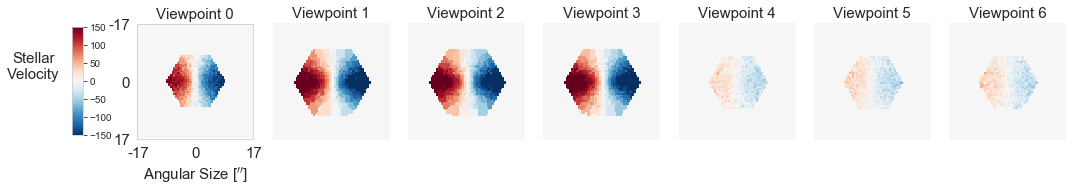

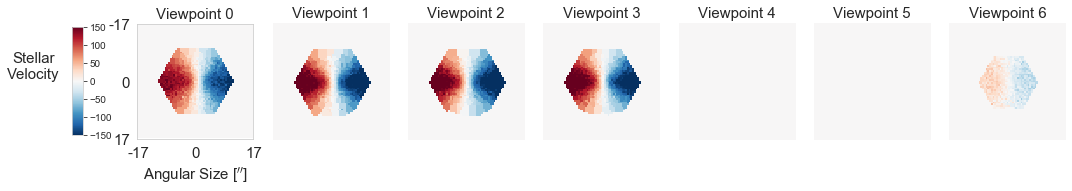

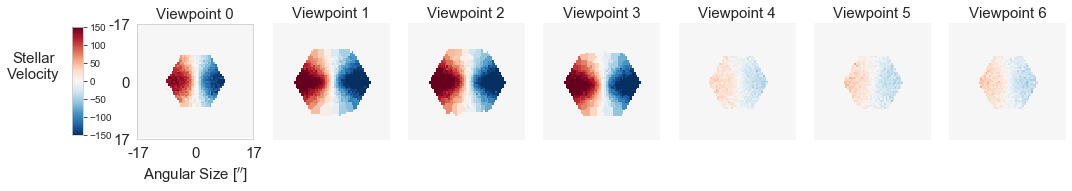

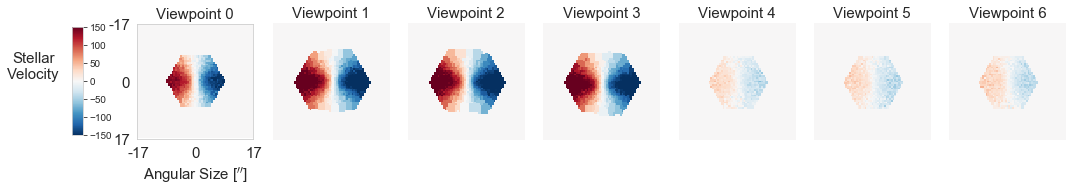

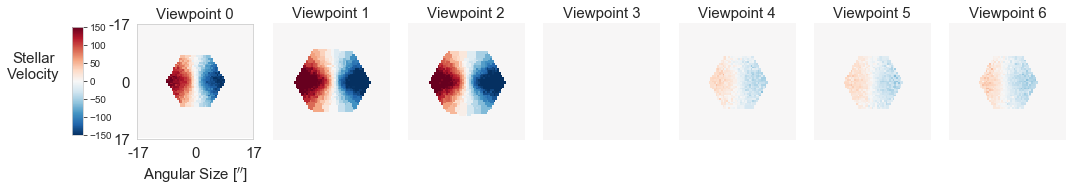

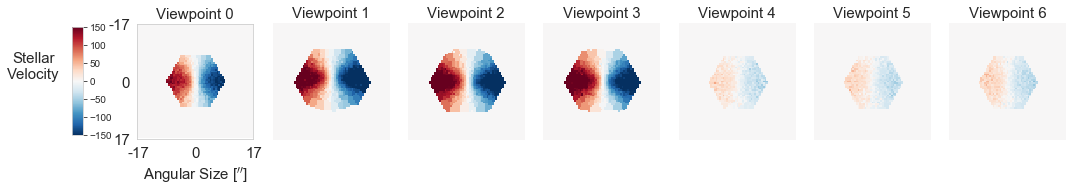

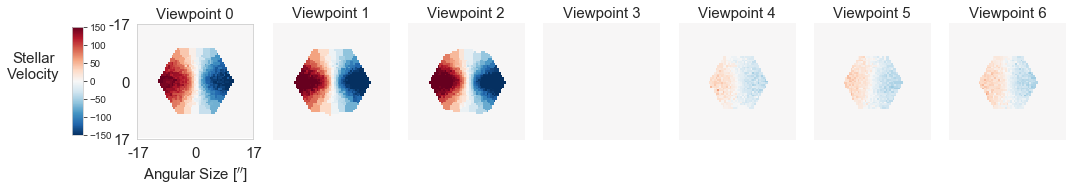

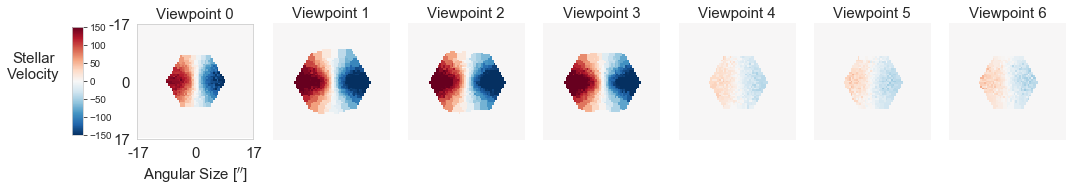

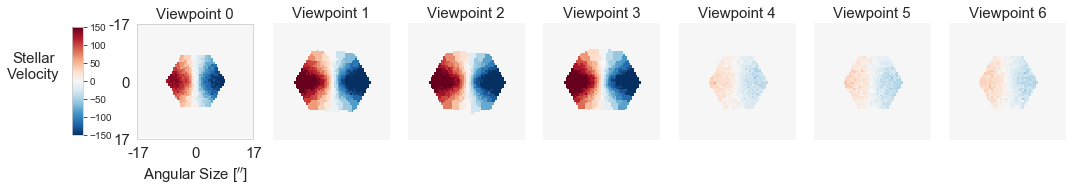

In [25]:
# This code creates all of the .png images, so I can only run it from my machine because it links to the
# kinematic cubes, which are somewhat large ('../kinematic_maps/kinematics...') and I don't want them
# on my Github

from astropy.io import fits
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
# Step to make velocity plots
myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320,    5,10,20,30,40,60,80,100,120,140,160]
# You are going to save these to your github page so that you can have an html link to them?
#myr = 210
#myr_list=[195,205,210]
#myr_list=[5,10,20,30,40,50,60,100,200]
#myr_list=[5, 10, 30, 50, 200]



#fg3_m15
myr_list=[5,60,90,120,150,180,210,240,270,300,320,340,360,380,400,420,440,460,480,500]
myr_list=[5,30,60,90,100,120,150,180,200]
run='fg3_m10_iso1_rotated'
run_file='fg3_m10_iso1_rotated'
view_list=[0,1,2,3,4,5,6]
degraded = 'degraded'

#myr_list=[170]


for i in range(len(myr_list)):
    myr = myr_list[i]
    fig, axs = plt.subplots(1,7, figsize=(15, 2.5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0, wspace=.2)

    axs = axs.ravel()
    for j in range(len(view_list)):
        view = view_list[j]
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            
        except FileNotFoundError:
            #could just be missing a viewpoint
            #so just construct a fake file
            fake = np.zeros((67,67))
            print('missing this viewpoint', j)
            if j ==0:
                im = axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            
                axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
                axs[j].tick_params(axis='both', which='major', labelsize=15)
                axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
                cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
                cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            else:
                axs[j].axis('off')
                axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
                axs[j].axis('off')
            axs[j].set_title('Viewpoint '+str(j), size=15)
            continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
        else:
            axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-150, vmax=150))
            axs[j].axis('off')
        axs[j].set_title('Viewpoint '+str(j), size=15)
        #plt.colorbar(im)
    plt.tight_layout()
    plt.savefig(str(run_file)+'_panels_'+str(degraded)+'/velocity_panel_'+str(run)+'_'+str(myr)+'.png', dpi=1000, bbox_to_inches='tight')
    
    

In [31]:
# Okay so there are three main aspects that I'd like to see with this interactive fig - 

# First I'd like to display all plots for all viewpoints for a moment in time, and the real challenge
# is that I'd like to display these .png images below the main figure, not just as a hover tool feature

# Second, I'd like to be able to togle through the different mountain plots for each simulation
# (this doesn't seem too hard to do)

# Third, I'd like to display using some sort of a tap select or hover the LDA value at each moment in time
# on the top plot (this is done)

In [50]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Band
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import Title
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Circle, CustomJS
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
from bokeh.models import Span
from bokeh.models import Range1d
from bokeh.layouts import gridplot
from bokeh.models import HoverTool 

In [51]:
output_notebook()

Loading BokehJS ...

In [72]:
degraded='degraded'
output_file("mountin_degraded.html")
myr_list_names=[[40,60,80,100,
                 120,140,160,
                 170,180,185, 190, 195, 205, 210, 220, 225, 230, 240,  260,265],
                [40, 70, 80, 100, 120, 140, 150, 170, 180, 190, 210, 220, 230, 235, 
             237,240, 242, 245,  247, 250, 252, 255, 257, 262, 265, 270, 275, 280, 285,289],
              [40, 50, 60, 70, 90, 120, 130, 140, 145, 150, 155, 170, 175, 180,
    185, 190, 195, 200, 205,210, 215,  220,225,  230, 235, 240,245, 250,260, 270,
    280, 290, 300, 310, 320, 330],
               [60,90,120,150,180,210,240,270,300,
               320,340,360,380,400,420],
               [40,60,100,200,300,400,410,420,
               600,640,700,800,840,900,940,980]]
myr_list_names_late=[[275,285,295,305,311,315,320],
                     [290,295,305],
                    [340,350,410],
                    [440,460,480,500],
                    [1000,
               1020,1040,1060,1080,1100,1140,
                1145,1150,1155,1160,1165,1168]]
myr_list_names_early=[[5,10,20,30,40,50,60,100,200],
                     [5,10,20,30,40,50,60,100,200],
                     [5,10,20,30,40,50,60,100,200],
                     [5,30,60,90,100,120,150,180,200],
                     [5,30,60,90,100,120,150,180,200]]
title_list = [r'q = 0.5, fg = 0.3', r'q = 0.333, fg = 0.3',r'q = 0.333, fg = 0.1',
             r'q = 0.2, fg = 0.3, B/T = 0.2', r'q = 0.1, fg = 0.3, B/T = 0.2']
prefix_list = ['fg3_m12', 'fg3_m13', 'fg1_m13', 'fg3_m15', 'fg3_m10']
iso_prefix_1_list = ['fg3_m12_iso1', 'fg3_m12_iso1', 'fg1_m13_iso1','fg3_m10_iso1','fg3_m10_iso1']
iso_prefix_2_list = ['fg3_m12_iso0.5', '','fg1_m13_iso0.333','','']
tab_list = []
colors = [ "#F5634A","#FF9C5B",
        "#FAD089","#86CD82","#254E70"]

for h in range(len(title_list)):
    print('run', title_list[h])
    sort_coef = significant_coef_list[h]
    
    sort_std = significant_std_list[h]
    sortedinput=significant_term_list[h]
    
    myr_list = myr_list_list[h]
    myr_list_sorted_left = myr_list_sorted_left_list[h]
    myr_list_sorted_right = myr_list_sorted_right_list[h]
    
    #~~~~~~
    myr_list_name = myr_list_names[h]
    
    if len(myr_list_name) != len(myr_list):
        print('run', title_list[h])
        for k in range(len(myr_list)):
            print(myr_list_name[k], myr_list[k])
        STOP
    
    myr_list_name_right = myr_list_names_late[h]
    myr_list_name_left = myr_list_names_early[h]
    
    
    #~~~~~~
    myr_here = myr_here_list[h]
    myr_here_non_left = myr_here_non_left_list[h]
    myr_here_non_right = myr_here_non_right_list[h]
    
    if len(myr_list_sorted_right) != len(myr_list_name_right) != len(myr_here_non_right):
        print('run', title_list[h])
        for k in range(len(myr_list_sorted_right)):
            print(myr_list_name_right[k], myr_list_sorted_right[k])
        STOP
    
    input_1_means = input_1_means_list[h]
    input_2_means = input_2_means_list[h]
    input_3_means = input_3_means_list[h]
    
    input_1_means_non = input_1_means_list_non[h]
    input_2_means_non = input_2_means_list_non[h]
    input_3_means_non = input_3_means_list_non[h]
    
    list_inter = list_inter_list[h]
    new_min_index = new_min_index_list[h]
    
    new_means = new_means_list[h]
    std = std_list[h]
    
    iso_prefix_1 = iso_prefix_1_list[h]
    iso_prefix_2 = iso_prefix_2_list[h]
    prefix = prefix_list[h]
    mean_non = mean_non_list[h]
    
    coalescence = coalescence_list[h]
    early = early_list[h]
    
    new_means_non_left = new_means_non_left_list[h]
    std_non_left = std_non_left_list[h]
    
    new_means_non_right = new_means_non_right_list[h]
    std_non_right = std_non_right_list[h]
    

    LDA_act = []
    LDA_l = []
    up = []
    low = []
    img_list = []
    img_disp_list = []

    

    # Okay but the trick is that for the early-stage isolated galaxies they are a combination
    # of two different merger simulations AND the early-stage (pre-pericentric passage) mergers
    # So you'll need to show multiple maps
    # 5,10,20,30 from the merger
    # #myr_list=[5,10,20,30,40,50,60,100,200] from iso1
    #myr_list=[5, 10, 30, 50, 200] from iso0.5


    myr_list_sorted = sorted(myr_list)
    myr_list_names_sorted = sorted(myr_list_name)
    
    
    #myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
    #myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320]



    for j in range(len(myr_here)):
        LDA_act.append(str(round(sort_coef[-1]*input_1_means[j],1))+' + '+str(round(sort_coef[-2]*input_2_means[j],1))+' + '+str(round(sort_coef[-3]*input_3_means[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        LDA_l.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        up.append(new_means[j]+std[j])
        low.append(new_means[j]-std[j])
        img_list.append('https://github.com/beckynevin/interactive_figs/blob/master/'+prefix+'_panels_degraded/velocity_panel_'+prefix+'_'+str(myr_list_names_sorted[j])+'.png?raw=true')

    up_left=[]
    low_left=[]
    LDA_act_left=[]
    LDA_l_left=[]
    img_disp_list_left=[]
    img_list_left=[]
    img_list_left_alt=[]
    img_list_left_alt_2=[]
    for j in range(len(myr_here_non_left)):
        LDA_act_left.append(str(round(sort_coef[-1]*input_1_means_non[j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        LDA_l_left.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        up_left.append(new_means_non_left[j]+std_non_left[j])
        low_left.append(new_means_non_left[j]-std_non_left[j])
        if myr_list_sorted_left[j]<40:
            try:
                img_list_left.append('https://github.com/beckynevin/interactive_figs/blob/master/'+prefix+'_panels_degraded/velocity_panel_'+prefix+'_'+str(myr_list_name_left[j])+'.png?raw=true')
            except:
                img_list_left.append('')
        else:
            img_list_left.append('')
        try:
            img_list_left_alt.append('https://github.com/beckynevin/interactive_figs/blob/master/'+iso_prefix_1+'_rotated_panels_degraded/velocity_panel_'+iso_prefix_1+'_rotated_'+str(myr_list_name_left[j])+'.png?raw=true')
        except:
            img_list_left_alt.append('')
        try:
            img_list_left_alt_2.append('https://github.com/beckynevin/interactive_figs/blob/master/'+iso_prefix_2+'_rotated_panels_degraded/velocity_panel_'+iso_prefix_2+'_rotated_'+str(myr_list_name_left[j])+'.png?raw=true')
        except:
            img_list_left_alt_2.append('')


    up_right=[]
    low_right=[]
    LDA_act_right=[]
    LDA_l_right=[]
    img_disp_list_right=[]
    img_list_right=[]
    for j in range(len(myr_here_non_right)):#myr_list_sorted_right
        try:
            LDA_act_right.append(str(round(sort_coef[-1]*input_1_means_non[len(myr_here_non_right):][j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[len(myr_here_non_right):][j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[len(myr_here_non_right):][j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        except:
            print(len(input_1_means_non), len(myr_here_non_right))
        LDA_l_right.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
        up_right.append(new_means_non_right[j]+std_non_right[j])
        low_right.append(new_means_non_right[j]-std_non_right[j])
        img_list_right.append('https://github.com/beckynevin/interactive_figs/blob/master/'+prefix+'_panels_degraded/velocity_panel_'+prefix+'_'+str(myr_list_name_right[j])+'.png?raw=true')

    source = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted,
        x=myr_here,
        y=new_means,
        upper=up,
        lower=low,
        desc=myr_here,
        LDA_list=LDA_l,
        LDA_actual=LDA_act,
        imgs=img_list))

    source1 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_left,
        x1=myr_here_non_left,
        y1=new_means_non_left,
        upper_l = up_left,
        lower_l = low_left,
        desc=myr_here_non_left,
        LDA_list_left=LDA_l_left,
        LDA_actual_left=LDA_act_left,
        imgs_left=img_list_left,
        imgs_left_alt = img_list_left_alt,
        imgs_left_alt_2 = img_list_left_alt_2))

    source2 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_right,
        x2=myr_here_non_right,
        y2=new_means_non_right,
        upper_r = up_right,
        lower_r = low_right,
        desc=myr_here_non_right,
        LDA_list_right=LDA_l_right,
        LDA_actual_right=LDA_act_right,
        imgs_right=img_list_right))

    TOOLTIPS = """
        <div>

                <img
                    src="@imgs" height="120" alt="@imgs" width="700"
                    style="float: center; margin: 0px 15px 15px 0px;"
                ></img>

            <div>
                <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list</span>
            </div>
            <div>
            <span style="font-size: 17px; font-weight: bold;">@y = @LDA_actual</span>
            </div>


        </div>
    """

    TOOLTIPS1 = """
        <div>

                <img
                    src="@imgs_left" height="120" alt="@imgs_left" width="700"
                    style="float: center; margin: 0px 0px 0px 0px;"
                ></img>

            <div>
            <img
                    src="@imgs_left_alt" height="120" alt="@imgs_left_alt" width="700"
                    style="float: center; margin: 0px 0px 0px 0px;"
                ></img>
            <div>
            <img
                    src="@imgs_left_alt_2" height="120" alt="@imgs_left_alt_2" width="700"
                    style="float: center; margin: 0px 0px 0px 0px;"
                ></img>
            <div>
                <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_left</span>
            </div>
            <div>
            <span style="font-size: 17px; font-weight: bold;">@y1 = @LDA_actual_left</span>
            </div>

        </div>
    """

    TOOLTIPS2 = """
        <div>

                <img
                    src="@imgs_right" height="120" alt="@imgs_right" width="700"
                    style="float: center; margin: 0px 15px 15px 0px;"
                ></img>

            <div>
                <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_right</span>
            </div>
            <div>
            <span style="font-size: 17px; font-weight: bold;">@y2 = @LDA_actual_right</span>
            </div>

        </div>
    """


    p = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd')#, tooltips=TOOLTIPS)
    #p = figure(tools="wheel_zoom,reset", match_aspect=True, )
    p.xgrid[0].grid_line_color=None
    p.ygrid[0].grid_line_alpha=0.5

    # Vertical line
    vline1 = Span(location=early, dimension='height', line_color='black', line_width=2,line_dash='dashed')
    vline2 = Span(location=coalescence, dimension='height', line_color='black', line_width=2,line_dash='dashed')
    vline3 = Span(location=coalescence+0.5, dimension='height', line_color='black', line_width=2,line_dash='dashed')

    # Horizontal line
    hline = Span(location=mean_non, dimension='width', line_color='black', line_width=2)

    p.renderers.extend([vline1, vline2, vline3, hline])


    p.line('x', 'y', color=colors[h], source=source)#, legend_label='Merger')

    #r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha = 0.05, size=7)#, legend_label='Merger',source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
    #r0_visible = Circle(x='x', y='y', fill_color='red', size=7, fill_alpha=0.5)#,source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
    #r0 = p.add_glyph(source, r0_invisible, selection_glyph = r0_visible, nonselection_glyph=r0_invisible)
    r0 = p.circle(x='x', y='y', fill_color=colors[h], line_color='black',fill_alpha=0.5,size=12, source=source)#, legend_label='Merger')#was p.circle

    #r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None,  size=7)

    #p.add_tools(HoverTool(renderers=[r0], tooltips=TOOLTIPS, renderers=[cr]))




    #invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
    #visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
    #cr = p.add_glyph(source, r0_invisible, selection_glyph=r0, nonselection_glyph=r0_invisible)

    # Add a hover tool, that selects the circle
    #code = "var indices = cb_data.renderer.data_source.inspected['1d'].indices;" 
    #"source.set('selected', cb_data['index']);"

    #var indices = cb_data.renderer.data_source.inspected['1d'].indices;
    #callback = CustomJS(args={'source': source}, code=code)
    p.add_tools(HoverTool(tooltips=TOOLTIPS,  renderers=[r0]))#, mode='hline'))







    p.xgrid.grid_line_color=None
    p.ygrid.grid_line_alpha=0.5

    band = Band(base='x', lower='lower', upper='upper', source = source ,level='underlay',
                fill_alpha=0.5, line_width=0, fill_color=colors[h])
    p.add_layout(band)


    p.line('x1', 'y1', color=blue, source=source1)#, legend_label='Nonmerger')
    r1 = p.circle('x1','y1', fill_color=blue, line_color='black', size=12, source=source1,  fill_alpha=0.5)#legend_label='Nonmerger',
    band = Band(base='x1', lower='lower_l', upper='upper_l', source = source1 ,level='underlay',
                fill_alpha=0.5, line_width=0, fill_color=blue)
    p.add_layout(band)

    p.add_tools(HoverTool(renderers=[r1], tooltips=TOOLTIPS1))


    p.line('x2','y2', color=blue, source=source2)
    r2 = p.circle('x2','y2',  line_color='black', size=12, source=source2, fill_color=blue, fill_alpha=0.5)#, nonselection_line_color="", nonselection_line_alpha=1.0)


    band = Band(base='x2', lower='lower_r', upper='upper_r', source = source2 ,level='underlay',
                fill_alpha=0.5, line_width=0, fill_color=blue)
    p.add_layout(band)

    p.add_tools(HoverTool(renderers=[r2], tooltips=TOOLTIPS2))
    #axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 

    ymax =  max(new_means+std)
    ymin = min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right))

    #p.x_range=Range1d(min(myr_here_non_left), max(myr_here_non_right))
    p.y_range=Range1d(min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right)), max(new_means+std))


    #labels = LabelSet(x='x', y='y', text='x', level='glyph',
    #              x_offset=5, y_offset=5, source=source, render_mode='canvas')

    peri = Label(x=myr_here[0], y=mean_non, x_units='data', y_units='data',
                     text='First Pericentric Passage', render_mode='css',
                     border_line_color='black', border_line_alpha=0.0,
                     background_fill_color='white', background_fill_alpha=0.0)
    coal = Label(x=coalescence+0.03, y=mean_non, x_units='data', y_units='data',
                     text='Coalescence', render_mode='css',
                     border_line_color='black', border_line_alpha=0.0,
                     background_fill_color='white', background_fill_alpha=0.0)

    # Now all the merger stages labels, maybe place them down below?
    PC = Label(x=coalescence+0.03, y=ymax-(ymax-ymin)/13, x_units='data', y_units='data',
                     text='Post-Coalescence', render_mode='css',
                     border_line_color='black', border_line_alpha=0.20,
                     background_fill_color=colors[h], background_fill_alpha=0.4)

    L = Label(x=early+0.1, y=ymax-(ymax-ymin)/13, x_units='data', y_units='data',
                     text='Late', render_mode='css',
                     border_line_color='black', border_line_alpha=0.3,
                     background_fill_color=colors[h], background_fill_alpha=0.4)

    E = Label(x=early-0.3, y=ymax-(ymax-ymin)/13, x_units='data', y_units='data',
                     text='Early', render_mode='css',
                     border_line_color='black', border_line_alpha=0.3,
                     background_fill_color=colors[h], background_fill_alpha=0.4)

    
    p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                       x_start=myr_here[0]+0.1, y_start=mean_non, x_end=myr_here[0], y_end=new_means[0]+0.2))
    p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                       x_start=coalescence+0.1, y_start=mean_non, x_end=coalescence, y_end=new_means[np.where(myr_here==coalescence)][0]+0.2))
    p.add_layout(Title(text="Merger Timeline [Gyr]", align="center"), "below")
    p.add_layout(Title(text="LD1", align="center"), "left")

    #p.add_layout(labels)
    p.add_layout(peri)
    p.add_layout(coal)
    p.add_layout(PC)
    p.add_layout(E)
    p.add_layout(L)

    empty = figure(plot_width=1300, plot_height=400,background_fill_color='white',x_range=(0,1), y_range=(0,1))
    empty.image_url(url='imgs', x=0, y=1, w=0.9, h=0.5, source=source)
    #empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_@myr_name_list.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)


    #div_image = empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_10.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)

    #def update(pokemon_number=10):
    #    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
    #    push_notebook()


    #interact(update, pokemon_number=myr_here)
    empty.xgrid[0].grid_line_color=None
    empty.ygrid[0].grid_line_alpha=0.0
    empty.axis.visible = False






    p1 = gridplot([p], ncols=1)

    tab = Panel(child=p1, title=title_list[h])
    tab_list.append(tab)
tabs = Tabs(tabs=tab_list)


'''show(tabs, notebook_handle=True)

interact(update, pokemon_number=[10, 40, 70])'''

show(tabs) # show the results




run q = 0.5, fg = 0.3
run q = 0.333, fg = 0.3
run q = 0.333, fg = 0.1
run q = 0.2, fg = 0.3, B/T = 0.2
run q = 0.1, fg = 0.3, B/T = 0.2
22 13
22 13
22 13
22 13


# This is the code for creating hte mountin.html plot that is on my website
# I would like to modify it to 
degraded='degraded'
output_file("mountin_degraded.html")


print('sorted inputs', sortedinput)
sort_coef = significant_coef
sort_std = significant_std
print('coeff', sort_coef )
print('std', sort_std)
sortedinput=significant_term

LDA_act = []
LDA_l = []
up = []
low = []
img_list = []
img_disp_list = []

myr_list = [40,60,80,100,120,140,160,170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265]
myr_list_sorted_left = [5,10,20,30,40,50,60,100,200]
myr_list_sorted_right = [275,285,295,305,311,315,320]

# Okay but the trick is that for the early-stage isolated galaxies they are a combination
# of two different merger simulations AND the early-stage (pre-pericentric passage) mergers
# So you'll need to show multiple maps
# 5,10,20,30 from the merger
# #myr_list=[5,10,20,30,40,50,60,100,200] from iso1
#myr_list=[5, 10, 30, 50, 200] from iso0.5


myr_list_sorted = sorted(myr_list)


#myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
#myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320]



for j in range(len(myr_here)):
    LDA_act.append(str(round(sort_coef[-1]*input_1_means[j],1))+' + '+str(round(sort_coef[-2]*input_2_means[j],1))+' + '+str(round(sort_coef[-3]*input_3_means[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up.append(new_means[j]+std[j])
    low.append(new_means[j]-std[j])
    img_disp_list.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels_'+str(degraded)+'/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted[j])+'.png?raw=true')
    img_list.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_'+str(degraded)+'/velocity_panel_fg3_m12_'+str(myr_list_sorted[j])+'.png?raw=true')

up_left=[]
low_left=[]
LDA_act_left=[]
LDA_l_left=[]
img_disp_list_left=[]
img_list_left=[]
img_list_left_alt=[]
img_list_left_alt_2=[]
for j in range(len(myr_here_non_left)):
    LDA_act_left.append(str(round(sort_coef[-1]*input_1_means_non[j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l_left.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up_left.append(new_means_non_left[j]+std_non_left[j])
    low_left.append(new_means_non_left[j]-std_non_left[j])
    img_disp_list_left.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels_'+str(degraded)+'/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    if myr_list_sorted_left[j]<40:
        try:
            img_list_left.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_'+str(degraded)+'/velocity_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
        except:
            img_list_left.append('')
    else:
        img_list_left.append('')
    try:
        img_list_left_alt.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_iso1_rotated_panels_'+str(degraded)+'/velocity_panel_fg3_m12_iso1_rotated_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    except:
        img_list_left_alt.append('')
    try:
        img_list_left_alt_2.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_iso0.5_rotated_panels_'+str(degraded)+'/velocity_panel_fg3_m12_iso0.5_rotated_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    except:
        img_list_left_alt_2.append('')
    
    
print('images from the myr', img_list_left)
up_right=[]
low_right=[]
LDA_act_right=[]
LDA_l_right=[]
img_disp_list_right=[]
img_list_right=[]
for j in range(len(myr_here_non_right)):
    LDA_act_right.append(str(round(sort_coef[-1]*input_1_means_non[len(myr_here_non_left):][j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[len(myr_here_non_left):][j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[len(myr_here_non_left):][j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l_right.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up_right.append(new_means_non_right[j]+std_non_right[j])
    low_right.append(new_means_non_right[j]-std_non_right[j])
    img_disp_list_right.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels_'+str(degraded)+'/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted_right[j])+'.png?raw=true')
    img_list_right.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_'+str(degraded)+'/velocity_panel_fg3_m12_'+str(myr_list_sorted_right[j])+'.png?raw=true')

source = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted,
    x=myr_here,
    y=new_means,
    upper=up,
    lower=low,
    desc=myr_here,
    LDA_list=LDA_l,
    LDA_actual=LDA_act,
    imgs=img_list,
    imgs_disp = img_disp_list))

source1 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_left,
    x1=myr_here_non_left,
    y1=new_means_non_left,
    upper_l = up_left,
    lower_l = low_left,
    desc=myr_here_non_left,
    LDA_list_left=LDA_l_left,
    LDA_actual_left=LDA_act_left,
    imgs_left=img_list_left,
    imgs_left_alt = img_list_left_alt,
    imgs_left_alt_2 = img_list_left_alt_2,
    imgs_disp_left = img_disp_list_left))

source2 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_right,
    x2=myr_here_non_right,
    y2=new_means_non_right,
    upper_r = up_right,
    lower_r = low_right,
    desc=myr_here_non_right,
    LDA_list_right=LDA_l_right,
    LDA_actual_right=LDA_act_right,
    imgs_right=img_list_right,
    imgs_disp_right = img_disp_list_right))

TOOLTIPS = """
    <div>
        
            <img
                src="@imgs" height="120" alt="@imgs" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y = @LDA_actual</span>
        </div>
        
      
    </div>
"""

TOOLTIPS1 = """
    <div>
        
            <img
                src="@imgs_left" height="120" alt="No fg3_m12" width="700"
                style="float: center; margin: 0px 0px 0px 0px;"
            ></img>
        
        <div>
        <img
                src="@imgs_left_alt" height="120" alt="No fg3_m12_iso1" width="700"
                style="float: center; margin: 0px 0px 0px 0px;"
            ></img>
        <div>
        <img
                src="@imgs_left_alt_2" height="120" alt="No fg3_m12_iso0.5" width="700"
                style="float: center; margin: 0px 0px 0px 0px;"
            ></img>
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_left</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y1 = @LDA_actual_left</span>
        </div>
        
    </div>
"""

TOOLTIPS2 = """
    <div>
        
            <img
                src="@imgs_right" height="120" alt="@imgs_right" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_right</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y2 = @LDA_actual_right</span>
        </div>
        
    </div>
"""


p = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd')#, tooltips=TOOLTIPS)
#p = figure(tools="wheel_zoom,reset", match_aspect=True, )
p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5

# Vertical line
vline1 = Span(location=early, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline2 = Span(location=coalescence, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline3 = Span(location=coalescence+0.5, dimension='height', line_color='black', line_width=2,line_dash='dashed')

# Horizontal line
hline = Span(location=mean_non, dimension='width', line_color='black', line_width=2)

p.renderers.extend([vline1, vline2, vline3, hline])


p.line('x', 'y', color='red', source=source, legend_label='Merger')

#r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha = 0.05, size=7)#, legend_label='Merger',source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
#r0_visible = Circle(x='x', y='y', fill_color='red', size=7, fill_alpha=0.5)#,source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
#r0 = p.add_glyph(source, r0_invisible, selection_glyph = r0_visible, nonselection_glyph=r0_invisible)
r0 = p.circle(x='x', y='y', fill_color='red', line_color='black',fill_alpha=0.5,size=12, source=source, legend_label='Merger')#was p.circle

#r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None,  size=7)

#p.add_tools(HoverTool(renderers=[r0], tooltips=TOOLTIPS, renderers=[cr]))




#invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
#visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
#cr = p.add_glyph(source, r0_invisible, selection_glyph=r0, nonselection_glyph=r0_invisible)

# Add a hover tool, that selects the circle
#code = "var indices = cb_data.renderer.data_source.inspected['1d'].indices;" 
#"source.set('selected', cb_data['index']);"

#var indices = cb_data.renderer.data_source.inspected['1d'].indices;
#callback = CustomJS(args={'source': source}, code=code)
p.add_tools(HoverTool(tooltips=TOOLTIPS,  renderers=[r0]))#, mode='hline'))







p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
    
band = Band(base='x', lower='lower', upper='upper', source = source ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='red')
p.add_layout(band)


p.line('x1', 'y1', color=blue, source=source1, legend_label='Nonmerger')
r1 = p.circle('x1','y1', fill_color=blue, line_color='black', size=12, source=source1, legend_label='Nonmerger', fill_alpha=0.5)
band = Band(base='x1', lower='lower_l', upper='upper_l', source = source1 ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color=blue)
p.add_layout(band)

p.add_tools(HoverTool(renderers=[r1], tooltips=TOOLTIPS1))


p.line('x2','y2', color=blue, source=source2)
r2 = p.circle('x2','y2',  line_color='black', size=12, source=source2, fill_color=blue, fill_alpha=0.5)#, nonselection_line_color="", nonselection_line_alpha=1.0)


band = Band(base='x2', lower='lower_r', upper='upper_r', source = source2 ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color=blue)
p.add_layout(band)

p.add_tools(HoverTool(renderers=[r2], tooltips=TOOLTIPS2))
#axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 

ymax =  max(new_means+std)
ymin = min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right))
    
p.x_range=Range1d(min(myr_here_non_left), max(myr_here_non_right))
p.y_range=Range1d(min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right)), max(new_means+std))


#labels = LabelSet(x='x', y='y', text='x', level='glyph',
#              x_offset=5, y_offset=5, source=source, render_mode='canvas')

peri = Label(x=myr_here[0], y=ymax-1, x_units='data', y_units='data',
                 text='First Pericentric Passage', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)
coal = Label(x=coalescence+0.03, y=ymax-1, x_units='data', y_units='data',
                 text='Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)

# Now all the merger stages labels, maybe place them down below?
PC = Label(x=coalescence+0.03, y=ymax-0.5, x_units='data', y_units='data',
                 text='Post-Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.20,
                 background_fill_color='red', background_fill_alpha=0.4)

L = Label(x=early+0.1, y=ymax-0.5, x_units='data', y_units='data',
                 text='Late', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)

E = Label(x=early-0.3, y=ymax-0.5, x_units='data', y_units='data',
                 text='Early', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)


p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=myr_here[0], y_start=ymax-1, x_end=myr_here[0], y_end=new_means[0]+0.2))
p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=coalescence+0.03, y_start=ymax-1, x_end=coalescence, y_end=new_means[coal_i][0]+0.2))
p.add_layout(Title(text="Merger Timeline [Gyr]", align="center"), "below")
p.add_layout(Title(text="LD1", align="center"), "left")

#p.add_layout(labels)
p.add_layout(peri)
p.add_layout(coal)
p.add_layout(PC)
p.add_layout(E)
p.add_layout(L)

empty = figure(plot_width=1300, plot_height=400,background_fill_color='white',x_range=(0,1), y_range=(0,1))
empty.image_url(url='imgs', x=0, y=1, w=0.9, h=0.5, source=source)
#empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_@myr_name_list.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)


#div_image = empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_10.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)

#def update(pokemon_number=10):
#    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
#    push_notebook()


#interact(update, pokemon_number=myr_here)
empty.xgrid[0].grid_line_color=None
empty.ygrid[0].grid_line_alpha=0.0
empty.axis.visible = False






p1 = gridplot([p], ncols=1)

tab1 = Panel(child=p1, title=r'q = 0.5, fg = 0.3')
tabs = Tabs(tabs=[tab1])


'''show(tabs, notebook_handle=True)

interact(update, pokemon_number=[10, 40, 70])'''

show(tabs) # show the results


